<a href="https://colab.research.google.com/github/gautam-18/EDA/blob/main/22BDS0010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

In [ ]:
import pandas as pd
!pip install pandas numpy matplotlib seaborn scipy


url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/wages.csv"
df = pd.read_csv(url)


df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6402 entries, 0 to 6401
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       6402 non-null   int64  
 1   id             6402 non-null   int64  
 2   lnw            6402 non-null   float64
 3   exper          6402 non-null   float64
 4   ged            6402 non-null   int64  
 5   postexp        6402 non-null   float64
 6   black          6402 non-null   int64  
 7   hispanic       6402 non-null   int64  
 8   hgc            6402 non-null   int64  
 9   hgc.9          6402 non-null   int64  
 10  uerate         6402 non-null   float64
 11  ue.7           6000 non-null   float64
 12  ue.centert1    5996 non-null   float64
 13  ue.mean        6402 non-null   float64
 14  ue.person.cen  6402 non-null   float64
 15  ue1            6402 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 800.4 KB


rownames  id    lnw  exper  ged  postexp  black  hispanic  hgc  hgc.9  \
0         1  31  1.491  0.015    1    0.015      0         1    8     -1   
1         2  31  1.433  0.715    1    0.715      0         1    8     -1   
2         3  31  1.469  1.734    1    1.734      0         1    8     -1   
3         4  31  1.749  2.773    1    2.773      0         1    8     -1   
4         5  31  1.931  3.927    1    3.927      0         1    8     -1   

   uerate   ue.7  ue.centert1  ue.mean  ue.person.cen   ue1  
0    3.21 -3.785         0.00     3.21           0.00  3.21  
1    3.21 -3.785         0.00     3.21           0.00  3.21  
2    3.21 -3.785         0.00     3.21           0.00  3.21  
3    3.30 -3.705         0.08     3.21           0.08  3.21  
4    2.89 -4.105        -0.32     3.21          -0.32  3.21

##1.1 Summary

In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (6402, 16)


In [ ]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
           rownames            id          lnw        exper          ged  \
count  6402.000000   6402.000000  6402.000000  6402.000000  6402.000000   
mean   3201.500000   6300.923930     1.896686     3.957221     0.271946   
std    1848.242544   3548.319594     0.427669     2.797018     0.444997   
min       1.000000     31.000000     0.708000     0.001000     0.000000   
25%    1601.250000   3194.000000     1.591000     1.609000     0.000000   
50%    3201.500000   6582.000000     1.842000     3.451000     0.000000   
75%    4801.750000   9300.000000     2.140000     5.949500     1.000000   
max    6402.000000  12543.000000     4.304000    12.700000     1.000000   

           postexp        black     hispanic          hgc        hgc.9  \
count  6402.000000  6402.000000  6402.000000  6402.000000  6402.000000   
mean      0.907643     0.252890     0.241018     8.947516    -0.052484   
std       2.000627     0.434702     0.427735     1.347135     1.347135   
min   

#Step 2 Data Cleaning / Data Preprocessing

In [ ]:


#Data Deduplication
print("Duplicate Rows Count:", df.duplicated().sum())

Duplicate Rows Count: 0


In [ ]:
#Replacing Values if neg in experinece
df['exper'] = df['exper'].apply(lambda x: 0 if x < 0 else x)

## 2.1 Handling Missing Values

In [ ]:

print("Any Missing Values?", df.isnull().values.any())


Any Missing Values? True


In [ ]:

print(df.isnull().sum())

rownames           0
id                 0
lnw                0
exper              0
ged                0
postexp            0
black              0
hispanic           0
hgc                0
hgc.9              0
uerate             0
ue.7             402
ue.centert1      406
ue.mean            0
ue.person.cen      0
ue1                0
dtype: int64


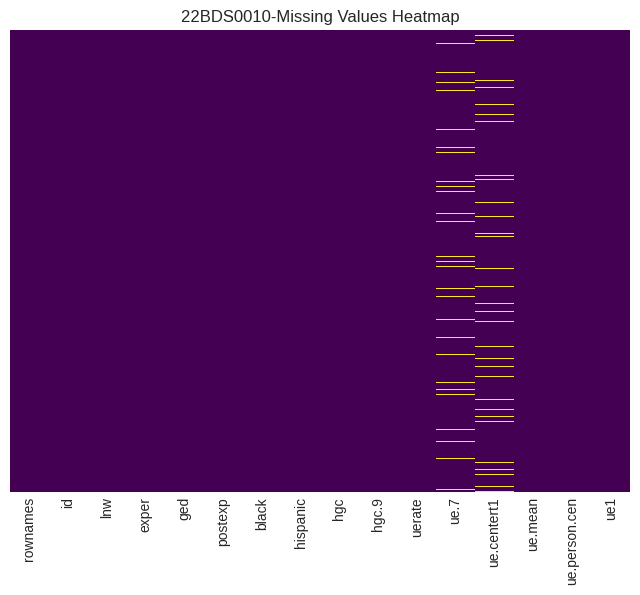

In [ ]:
# Handling MissingData

#Visualising Missing Data Using Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("22BDS0010-Missing Values Heatmap")
plt.show()


In [ ]:
#Filling Missing Values
df['ue.centert1'] = df['ue.centert1'].fillna(df['ue.centert1'].mean())
df['ue.7'] = df['ue.7'].fillna(df['ue.7'].median())

print(df.isnull().sum())

rownames         0
id               0
lnw              0
exper            0
ged              0
postexp          0
black            0
hispanic         0
hgc              0
hgc.9            0
uerate           0
ue.7             0
ue.centert1      0
ue.mean          0
ue.person.cen    0
ue1              0
dtype: int64


In [ ]:
df.isnull()

rownames     id    lnw  exper    ged  postexp  black  hispanic    hgc  \
0        False  False  False  False  False    False  False     False  False   
1        False  False  False  False  False    False  False     False  False   
2        False  False  False  False  False    False  False     False  False   
3        False  False  False  False  False    False  False     False  False   
4        False  False  False  False  False    False  False     False  False   
...        ...    ...    ...    ...    ...      ...    ...       ...    ...   
6397     False  False  False  False  False    False  False     False  False   
6398     False  False  False  False  False    False  False     False  False   
6399     False  False  False  False  False    False  False     False  False   
6400     False  False  False  False  False    False  False     False  False   
6401     False  False  False  False  False    False  False     False  False   

      hgc.9  uerate   ue.7  ue.centert1  ue.mean  ue.person.cen    ue1  
0     False   False  False        False    False          False  False  
1     False   False  False        False    False          False  False  
2     False   False  False        False    False          False  False  
3     False   False  False        False    False          False  False  
4     False   False  False        False    False          False  False  
...     ...     ...    ...          ...      ...            ...    ...  
6397  False   False  False        False    False          False  False  
6398  False   False  False        False    False          False  False  
6399  False   False  False        False    False          False  False  
6400  False   False  False        False    False          False  False  
6401  False   False  False        False    False          False  False  

[6402 rows x 16 columns]

## 2.2 Data Trasformation

In [ ]:



df['lnw_bins'] = pd.cut(df['lnw'], bins=3, labels=['Low', 'Medium', 'High'])


print(df[['lnw', 'lnw_bins']].head())


     lnw lnw_bins
0  1.491      Low
1  1.433      Low
2  1.469      Low
3  1.749      Low
4  1.931   Medium


In [ ]:
# Binning the 'exper' column into 4 equal-frequency categories
df['exper_bins'] = pd.qcut(df['exper'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])

# Check the resulting bins
print(df[['exper', 'exper_bins']].head())


   exper exper_bins
0  0.015   Very Low
1  0.715   Very Low
2  1.734        Low
3  2.773        Low
4  3.927     Medium


In [ ]:

bin_edges = [0, 2, 2.5, 3, 3.25, 3.5]
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['uerate_bins'] = pd.cut(df['uerate'], bins=bin_edges, labels=bin_labels)


print(df[['uerate', 'uerate_bins']].head())


   uerate uerate_bins
0    3.21        High
1    3.21        High
2    3.21        High
3    3.30   Very High
4    2.89      Medium


In [ ]:
print(df['lnw_bins'].value_counts())
print(df['exper_bins'].value_counts())
print(df['uerate_bins'].value_counts())

lnw_bins
Low       3619
Medium    2708
High        75
Name: count, dtype: int64
exper_bins
Very Low    1601
Low         1601
High        1601
Medium      1599
Name: count, dtype: int64
uerate_bins
Very High    80
Medium       78
High         34
Low          12
Very Low      1
Name: count, dtype: int64


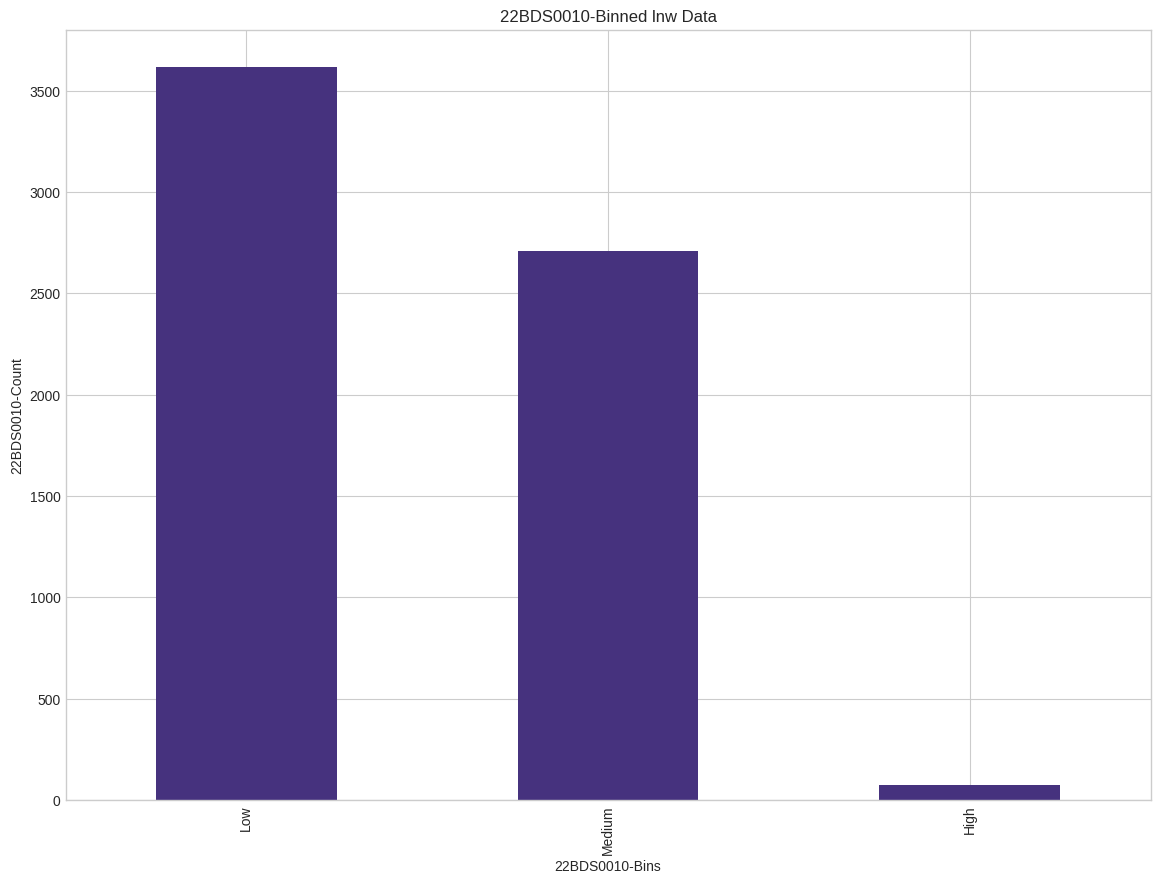

In [ ]:
import matplotlib.pyplot as plt


df['lnw_bins'].value_counts().plot(kind='bar')
plt.title('22BDS0010-Binned lnw Data')
plt.xlabel('22BDS0010-Bins')
plt.ylabel('22BDS0010-Count')
plt.show()


## 2.3 Outlier handling

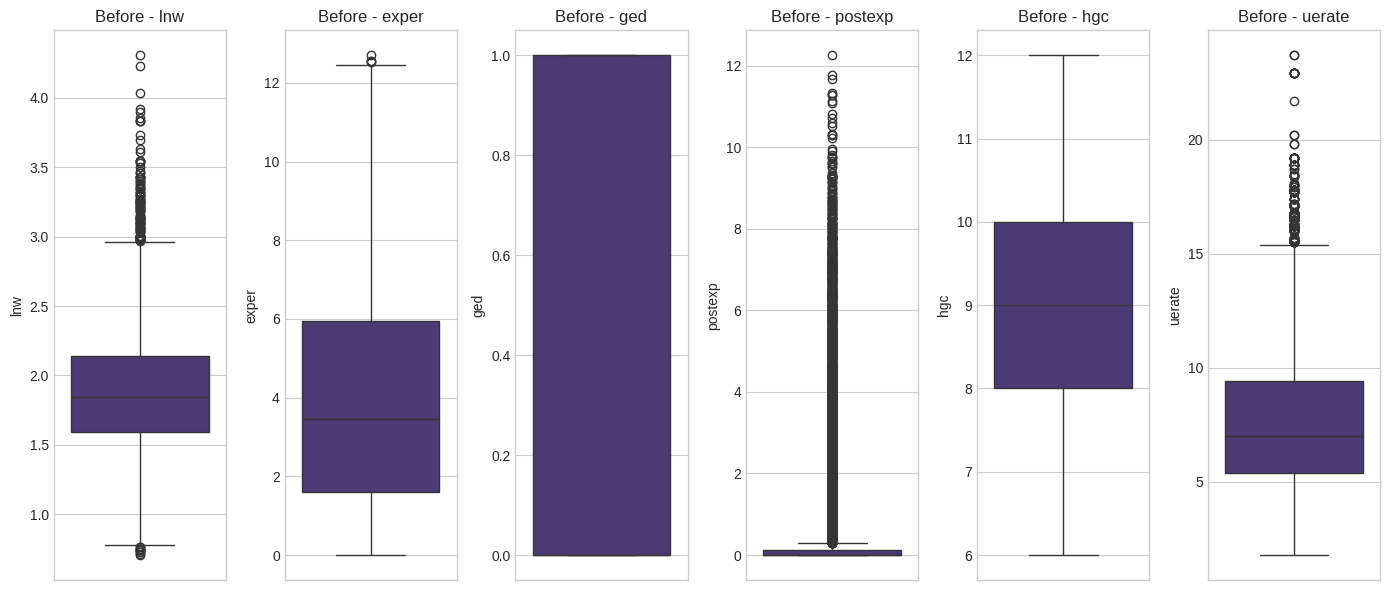

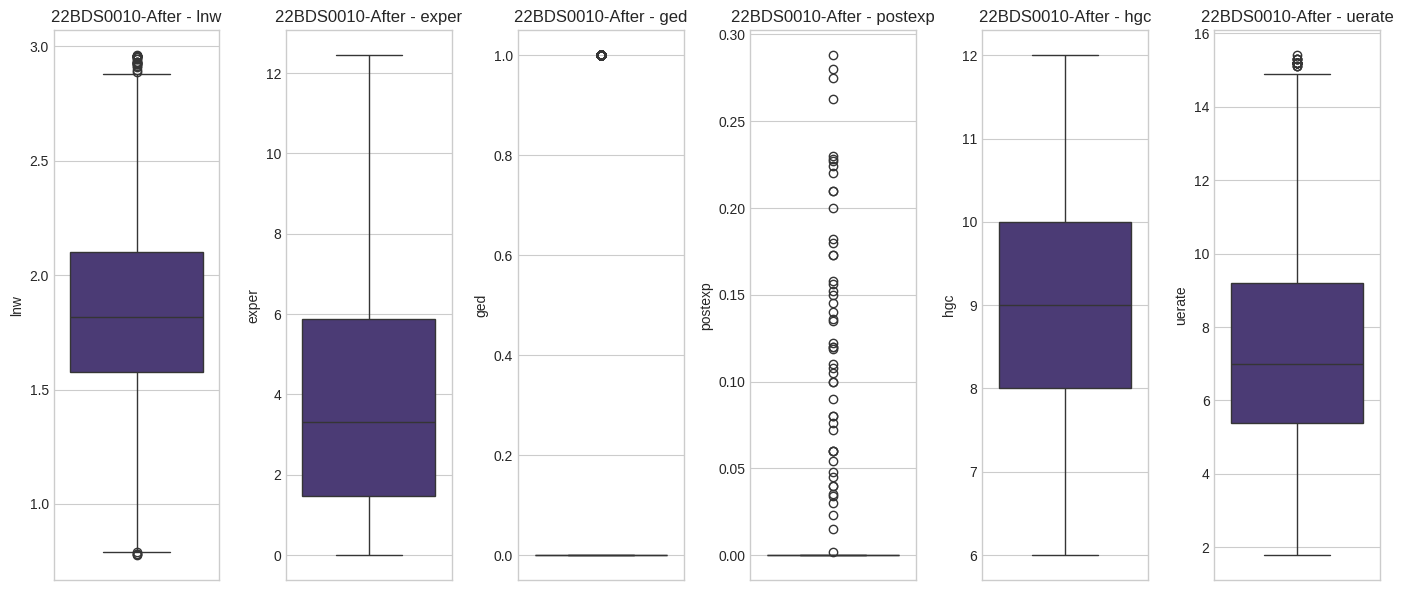

22BDS0010 Original dataset shape: (6402, 19)
22BDS0010 Cleaned dataset shape: (4549, 19)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


columns_to_check = ['lnw', 'exper', 'ged', 'postexp', 'hgc', 'uerate']


plt.figure(figsize=(14, 6))
for i, column in enumerate(columns_to_check):
    plt.subplot(1, len(columns_to_check), i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f"Before - {column}")
plt.tight_layout()
plt.show()

# Outlier removal using IQR
df_cleaned = df.copy()
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

# Plotting boxplots after removing outliers
plt.figure(figsize=(14, 6))
for i, column in enumerate(columns_to_check):
    plt.subplot(1, len(columns_to_check), i + 1)
    sns.boxplot(data=df_cleaned, y=column)
    plt.title(f"22BDS0010-After - {column}")
plt.tight_layout()
plt.show()

print(f"22BDS0010 Original dataset shape: {df.shape}")
print(f"22BDS0010 Cleaned dataset shape: {df_cleaned.shape}")


# **Step 3 Univariate analysis**

In [ ]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(df.head(3))
print(df.tail(3))

   rownames  id    lnw  exper  ged  postexp  black  hispanic  hgc  hgc.9  \
0         1  31  1.491  0.015    1    0.015      0         1    8     -1   
1         2  31  1.433  0.715    1    0.715      0         1    8     -1   
2         3  31  1.469  1.734    1    1.734      0         1    8     -1   

   uerate   ue.7  ue.centert1  ue.mean  ue.person.cen   ue1 lnw_bins  \
0    3.21 -3.785          0.0     3.21            0.0  3.21      Low   
1    3.21 -3.785          0.0     3.21            0.0  3.21      Low   
2    3.21 -3.785          0.0     3.21            0.0  3.21      Low   

  exper_bins uerate_bins  
0   Very Low        High  
1   Very Low        High  
2        Low        High  
      rownames     id    lnw  exper  ged  postexp  black  hispanic  hgc  \
6399      6400  12543  1.307  5.020    0      0.0      0         0    8   
6400      6401  12543  1.842  5.681    0      0.0      0         0    8   
6401      6402  12543  1.658  6.700    0      0.0      0         0    8  

In [ ]:
df.dtypes

rownames            int64
id                  int64
lnw               float64
exper             float64
ged                 int64
postexp           float64
black               int64
hispanic            int64
hgc                 int64
hgc.9               int64
uerate            float64
ue.7              float64
ue.centert1       float64
ue.mean           float64
ue.person.cen     float64
ue1               float64
lnw_bins         category
exper_bins       category
uerate_bins      category
dtype: object

In [ ]:
print(df.describe())
pd.isna(df).any()


          rownames            id          lnw        exper          ged  \
count  6402.000000   6402.000000  6402.000000  6402.000000  6402.000000   
mean   3201.500000   6300.923930     1.896686     3.957221     0.271946   
std    1848.242544   3548.319594     0.427669     2.797018     0.444997   
min       1.000000     31.000000     0.708000     0.001000     0.000000   
25%    1601.250000   3194.000000     1.591000     1.609000     0.000000   
50%    3201.500000   6582.000000     1.842000     3.451000     0.000000   
75%    4801.750000   9300.000000     2.140000     5.949500     1.000000   
max    6402.000000  12543.000000     4.304000    12.700000     1.000000   

           postexp        black     hispanic          hgc        hgc.9  \
count  6402.000000  6402.000000  6402.000000  6402.000000  6402.000000   
mean      0.907643     0.252890     0.241018     8.947516    -0.052484   
std       2.000627     0.434702     0.427735     1.347135     1.347135   
min       0.000000     0.000

rownames         False
id               False
lnw              False
exper            False
ged              False
postexp          False
black            False
hispanic         False
hgc              False
hgc.9            False
uerate           False
ue.7             False
ue.centert1      False
ue.mean          False
ue.person.cen    False
ue1              False
lnw_bins         False
exper_bins       False
uerate_bins       True
dtype: bool

##3.1 Histogram


Text(0.5, 1.0, '22BDS0010-Histogram of lnw')

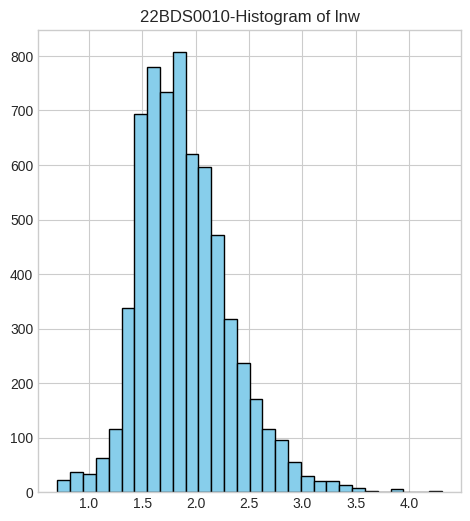

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['lnw'], bins=30, color='skyblue', edgecolor='black')
plt.title('22BDS0010-Histogram of lnw')





## 3.2 Density Plot

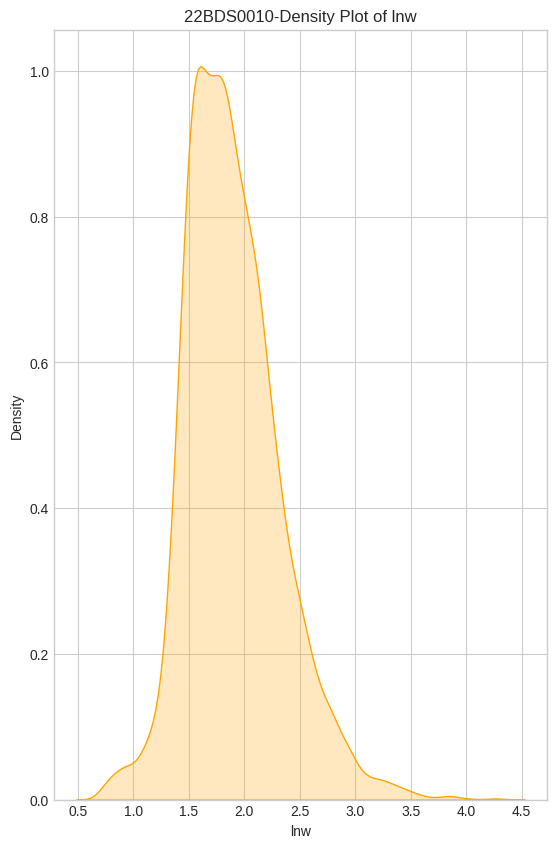

In [ ]:
plt.subplot(1, 2, 2)
sns.kdeplot(df['lnw'], fill=True, color='orange')
plt.title('22BDS0010-Density Plot of lnw')

plt.show()



##3.3 Box Plot

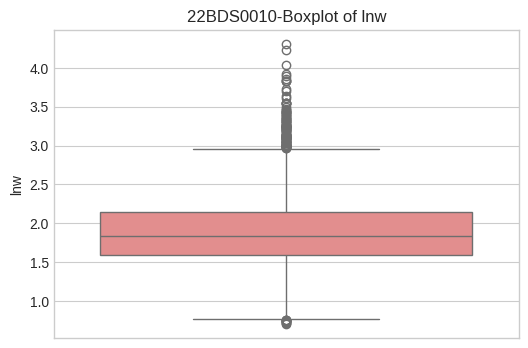

In [ ]:

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['lnw'], color='lightcoral')
plt.title('22BDS0010-Boxplot of lnw')

plt.show()

##3.4 Bar Plot

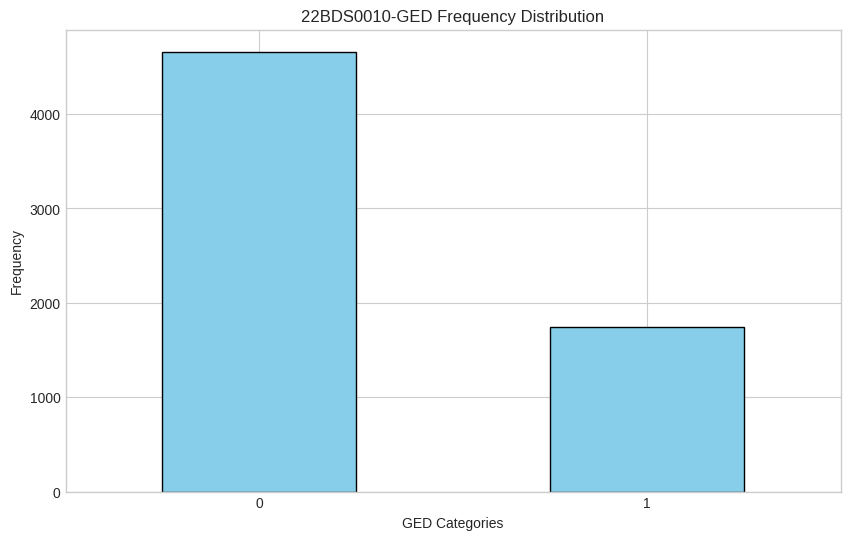

In [ ]:


df2 = pd.read_csv(url)

ged_counts = df2['ged'].value_counts()

plt.figure(figsize=(10, 6))
ged_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("22BDS0010-GED Frequency Distribution")
plt.xlabel("GED Categories")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()


## 3.5 Pie Plot

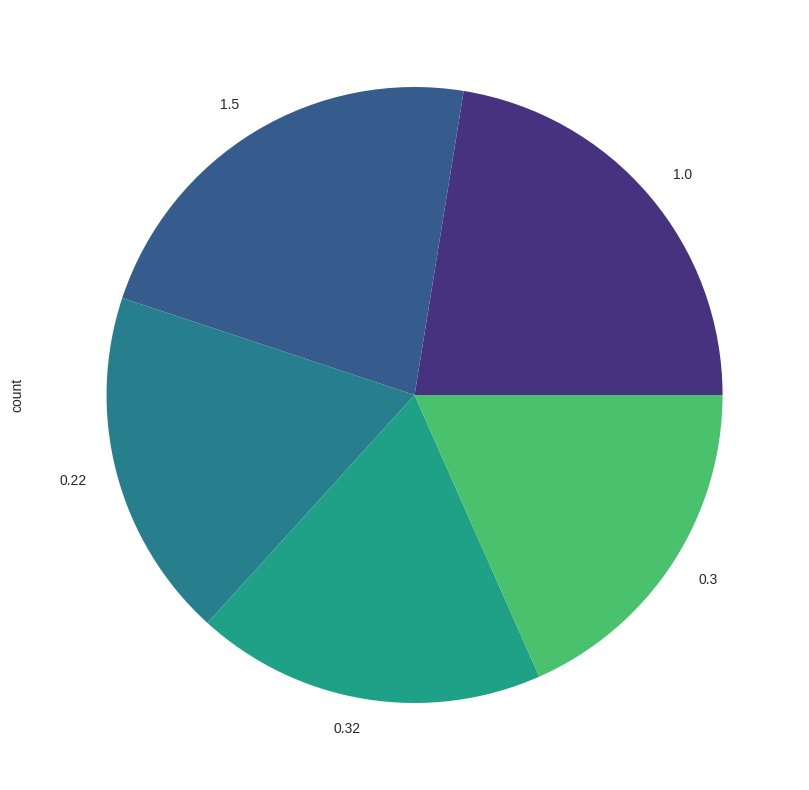

In [ ]:
df['exper'].value_counts().head(5).plot.pie()
plt.show()


## 3.6 Dot Plot

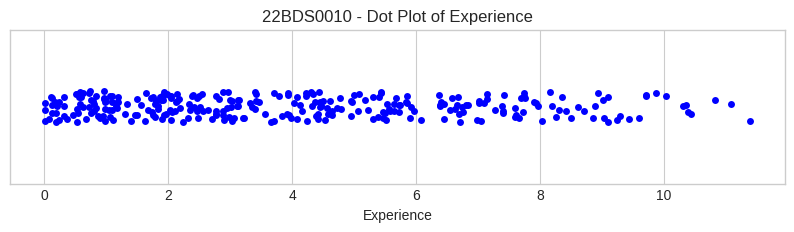

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 2))
sns.stripplot(x=df['exper'], color='blue', size=5)
plt.title('22BDS0010 - Dot Plot of Experience')
plt.xlabel('Experience')
plt.yticks([])
plt.show()


## 3.7   Distribution Analysis using Histograms and KDE for Numerical Features

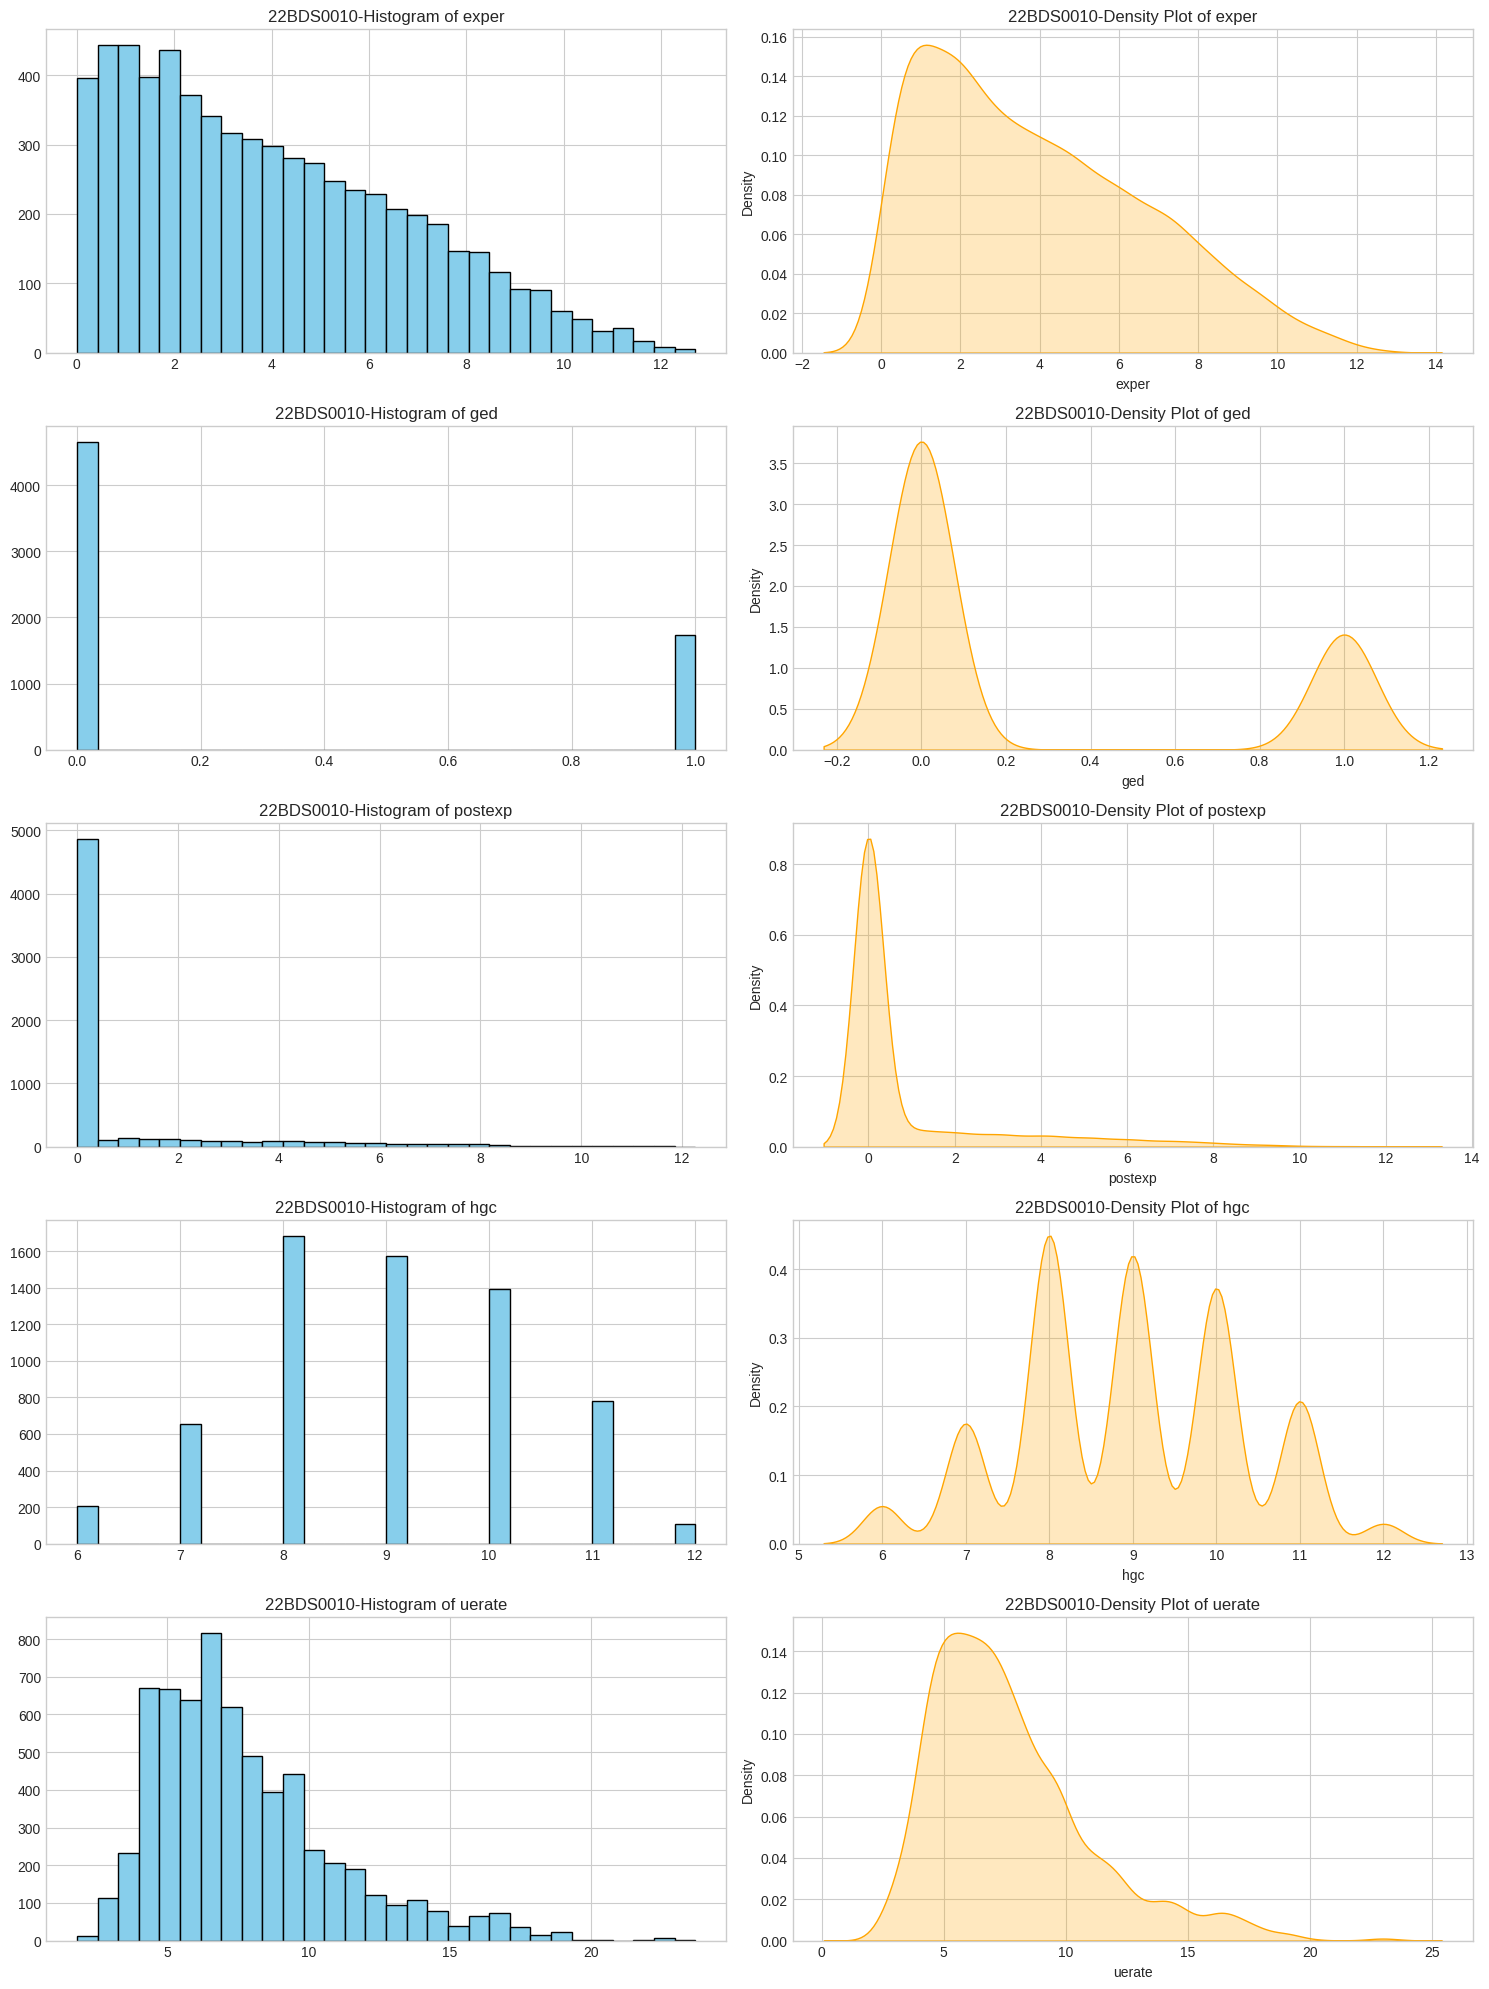

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(url)
numerical_columns = ['exper', 'ged', 'postexp', 'hgc', 'uerate']


plt.figure(figsize=(15, 20))


plt.subplot(5, 2, 1)
plt.hist(df['exper'], bins=30, color='skyblue', edgecolor='black')
plt.title('22BDS0010-Histogram of exper')
plt.subplot(5, 2, 2)
sns.kdeplot(df['exper'], fill=True, color='orange')
plt.title('22BDS0010-Density Plot of exper')


plt.subplot(5, 2, 3)
plt.hist(df['ged'], bins=30, color='skyblue', edgecolor='black')
plt.title('22BDS0010-Histogram of ged')
plt.subplot(5, 2, 4)
sns.kdeplot(df['ged'], fill=True, color='orange')
plt.title('22BDS0010-Density Plot of ged')


plt.subplot(5, 2, 5)
plt.hist(df['postexp'], bins=30, color='skyblue', edgecolor='black')
plt.title('22BDS0010-Histogram of postexp')
plt.subplot(5, 2, 6)
sns.kdeplot(df['postexp'], fill=True, color='orange')
plt.title('22BDS0010-Density Plot of postexp')


plt.subplot(5, 2, 7)
plt.hist(df['hgc'], bins=30, color='skyblue', edgecolor='black')
plt.title('22BDS0010-Histogram of hgc')
plt.subplot(5, 2, 8)
sns.kdeplot(df['hgc'], fill=True, color='orange')
plt.title('22BDS0010-Density Plot of hgc')

plt.subplot(5, 2, 9)
plt.hist(df['uerate'], bins=30, color='skyblue', edgecolor='black')
plt.title('22BDS0010-Histogram of uerate')
plt.subplot(5, 2, 10)
sns.kdeplot(df['uerate'], fill=True, color='orange')
plt.title('22BDS0010-Density Plot of uerate')

plt.tight_layout()
plt.show()


# **Step 4 Bivariate Analysis**

## 4.1 Categorical Vs Categorical

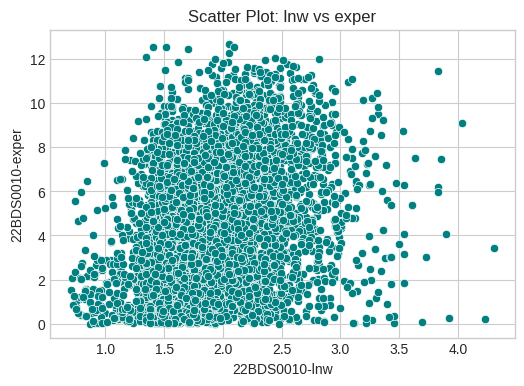

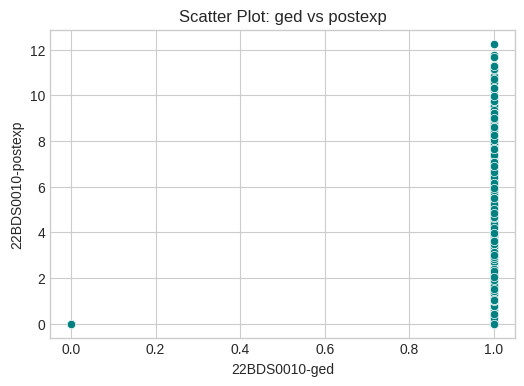

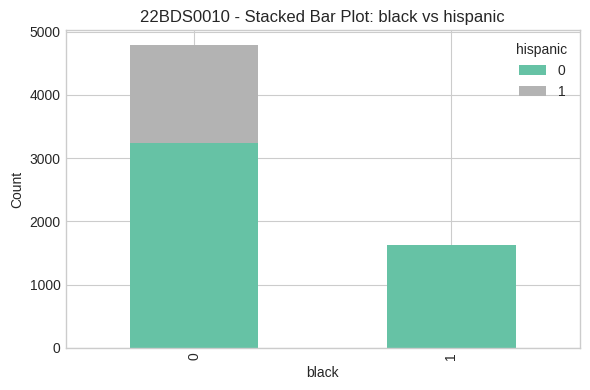

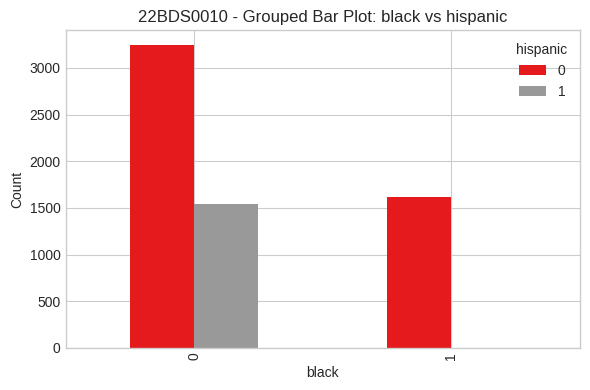

In [ ]:

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['lnw'], y=df['exper'], color='teal')
plt.title('Scatter Plot: lnw vs exper')
plt.xlabel('22BDS0010-lnw')
plt.ylabel('22BDS0010-exper')
plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['ged'], y=df['postexp'], color='teal')
plt.title('Scatter Plot: ged vs postexp')
plt.xlabel('22BDS0010-ged')
plt.ylabel('22BDS0010-postexp')
plt.show()


cross_tab = pd.crosstab(df['black'], df['hispanic'])
cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')
plt.title('22BDS0010 - Stacked Bar Plot: black vs hispanic')
plt.xlabel('black')
plt.ylabel('Count')
plt.legend(title='hispanic')
plt.tight_layout()
plt.show()


cross_tab.plot(kind='bar', stacked=False, figsize=(6, 4), colormap='Set1')
plt.title('22BDS0010 - Grouped Bar Plot: black vs hispanic')
plt.xlabel('black')
plt.ylabel('Count')
plt.legend(title='hispanic')
plt.tight_layout()
plt.show()



## 4.2 Categorical Vs Numerical

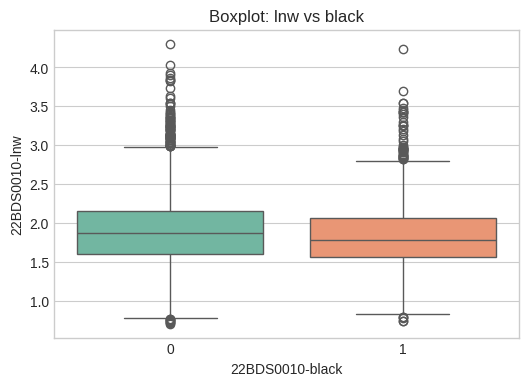

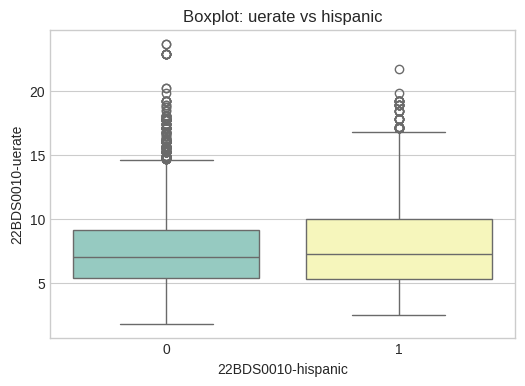

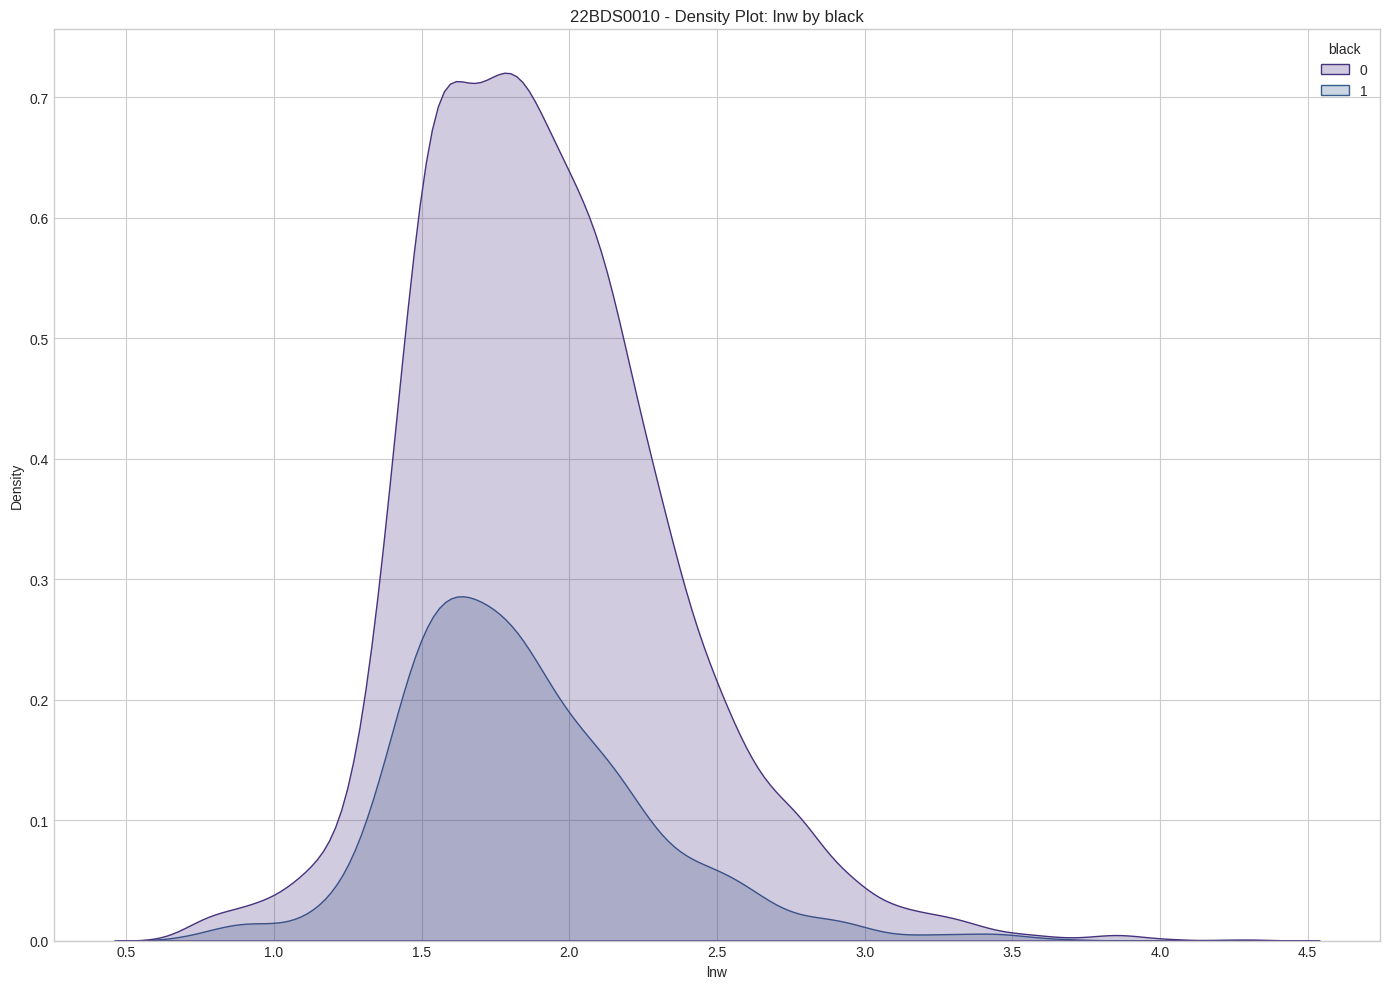

<ipython-input-415-b703ed12cb17>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




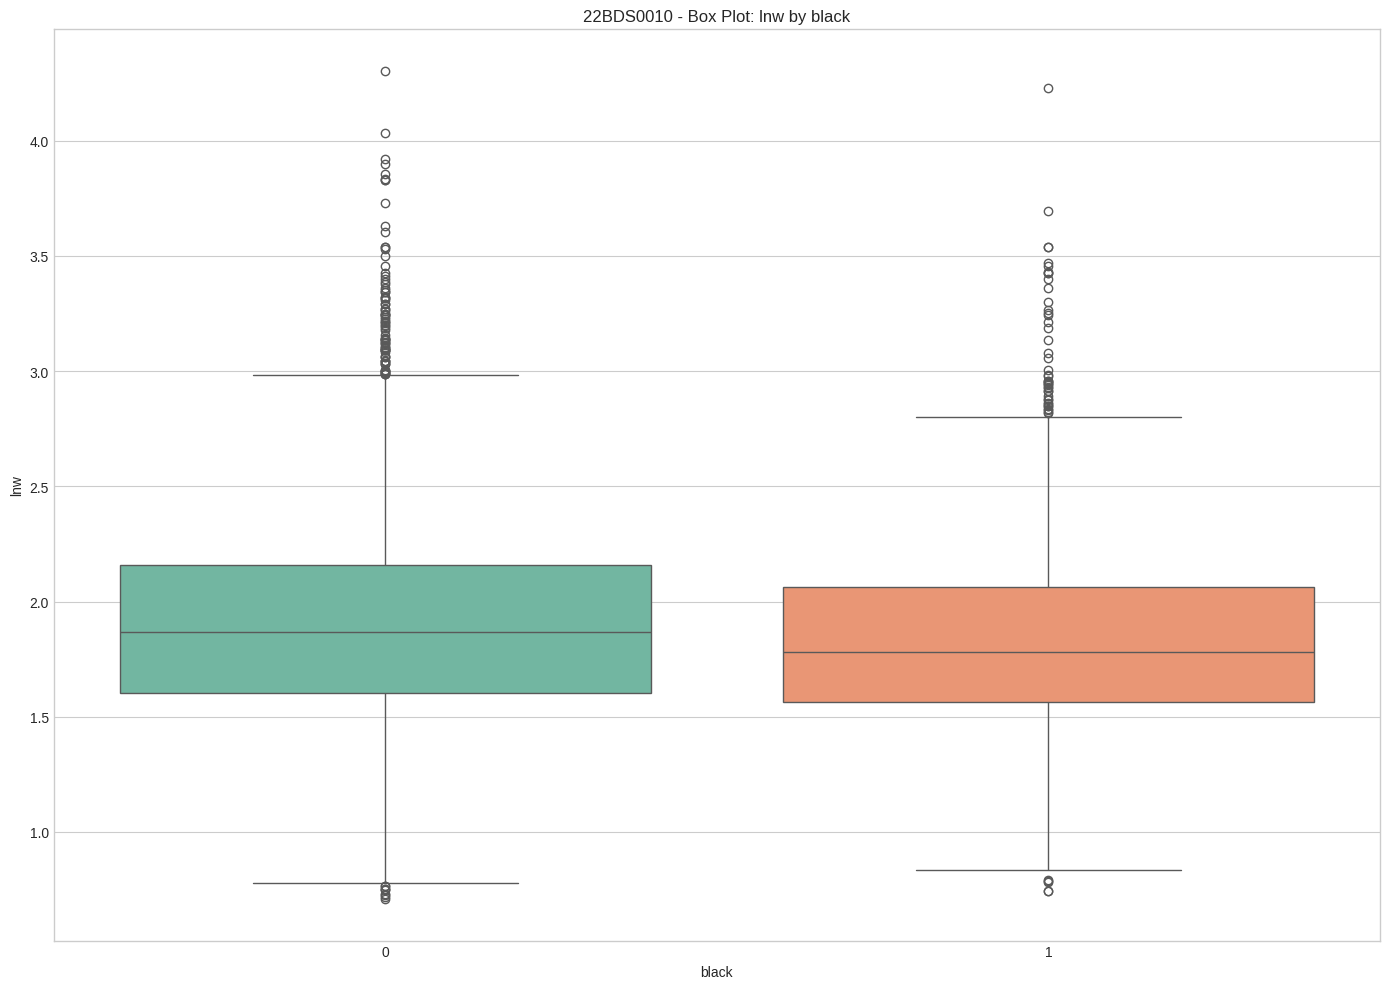

<ipython-input-415-b703ed12cb17>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




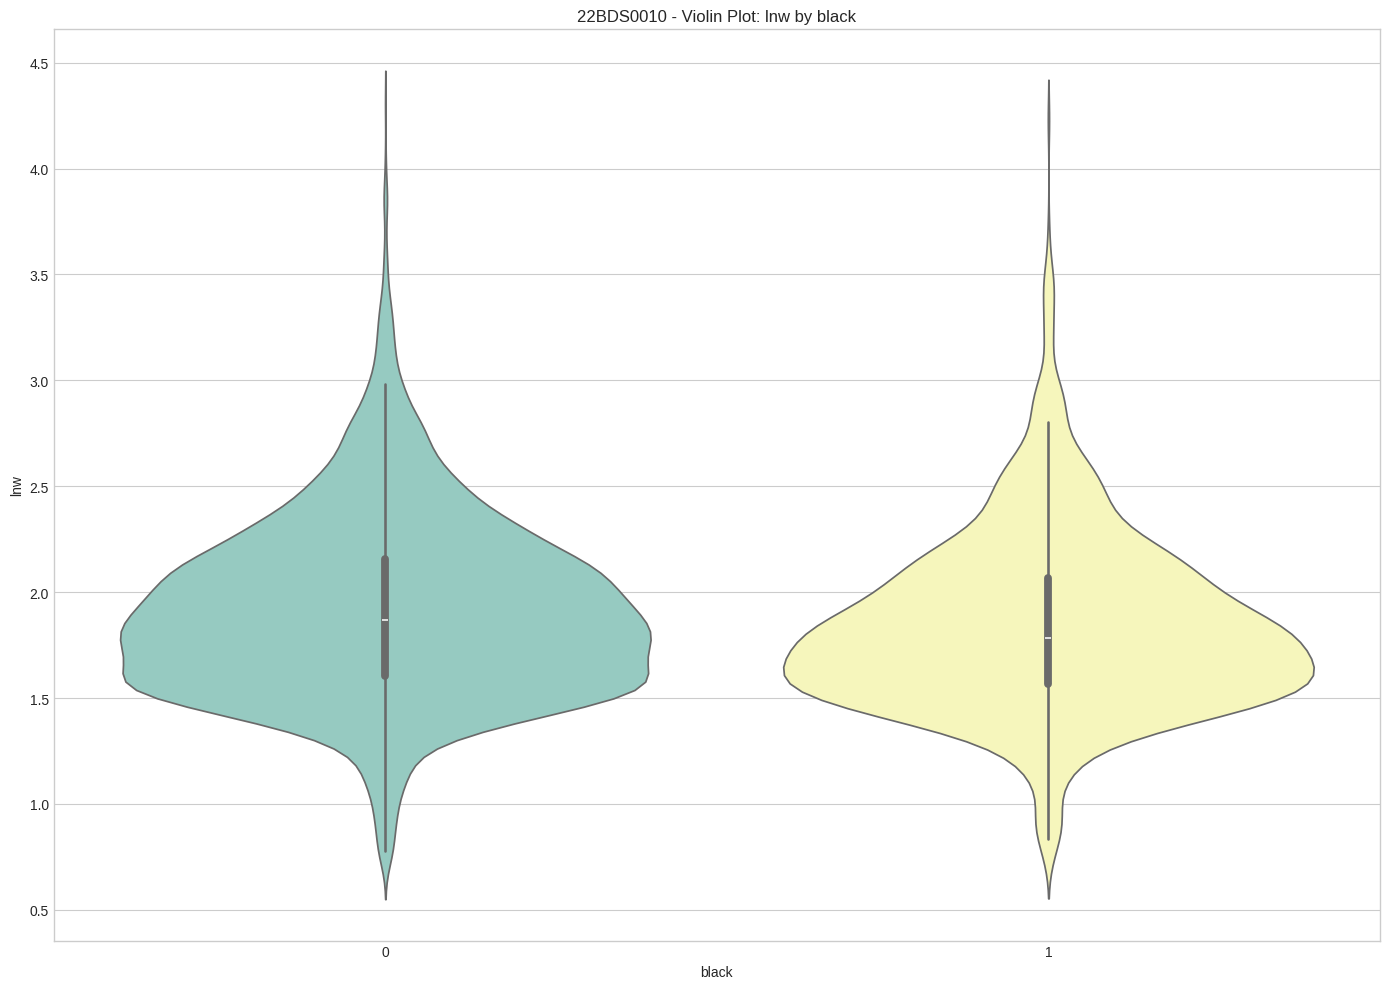

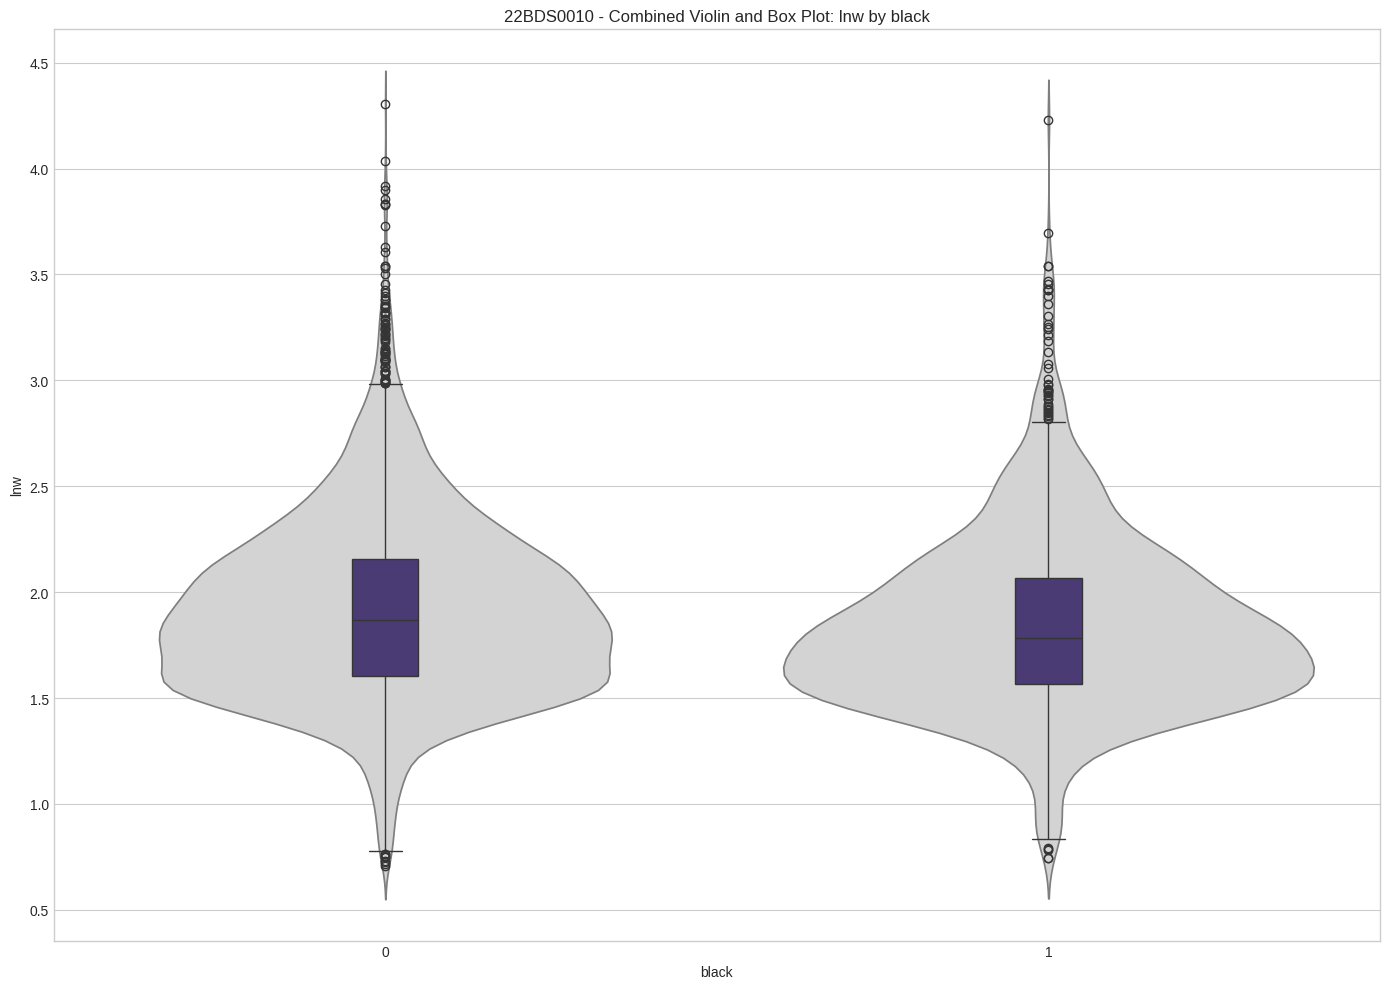

In [ ]:
df = pd.read_csv(url)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['black'], y=df['lnw'], hue=df['black'], palette='Set2', legend=False)
plt.title('Boxplot: lnw vs black')
plt.xlabel('22BDS0010-black')
plt.ylabel('22BDS0010-lnw')
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x=df['hispanic'], y=df['uerate'], hue=df['hispanic'], palette='Set3', legend=False)
plt.title('Boxplot: uerate vs hispanic')
plt.xlabel('22BDS0010-hispanic')
plt.ylabel('22BDS0010-uerate')
plt.show()

sns.kdeplot(data=df, x='lnw', hue='black', fill=True)
plt.title('22BDS0010 - Density Plot: lnw by black')
plt.xlabel('lnw')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


sns.boxplot(x='black', y='lnw', data=df, palette='Set2')
plt.title('22BDS0010 - Box Plot: lnw by black')
plt.tight_layout()
plt.show()

sns.violinplot(x='black', y='lnw', data=df, palette='Set3')
plt.title('22BDS0010 - Violin Plot: lnw by black')
plt.tight_layout()
plt.show()

sns.violinplot(x='black', y='lnw', data=df, inner=None, color='lightgray')
sns.boxplot(x='black', y='lnw', data=df, width=0.1)
plt.title('22BDS0010 - Combined Violin and Box Plot: lnw by black')
plt.tight_layout()
plt.show()



## 4.3 Quantitative vs Quantitative

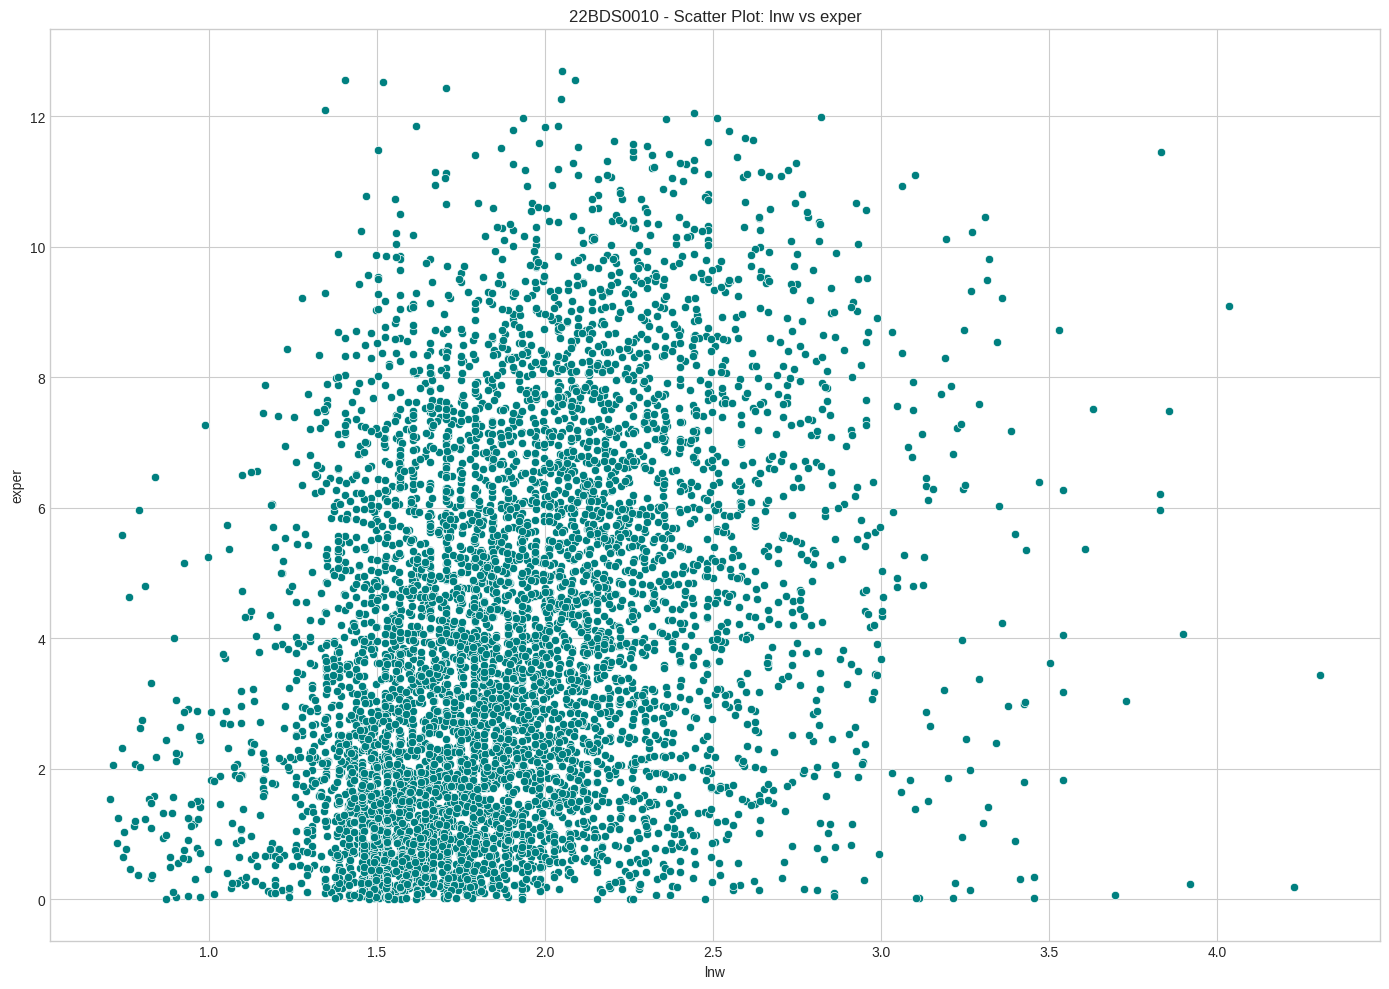

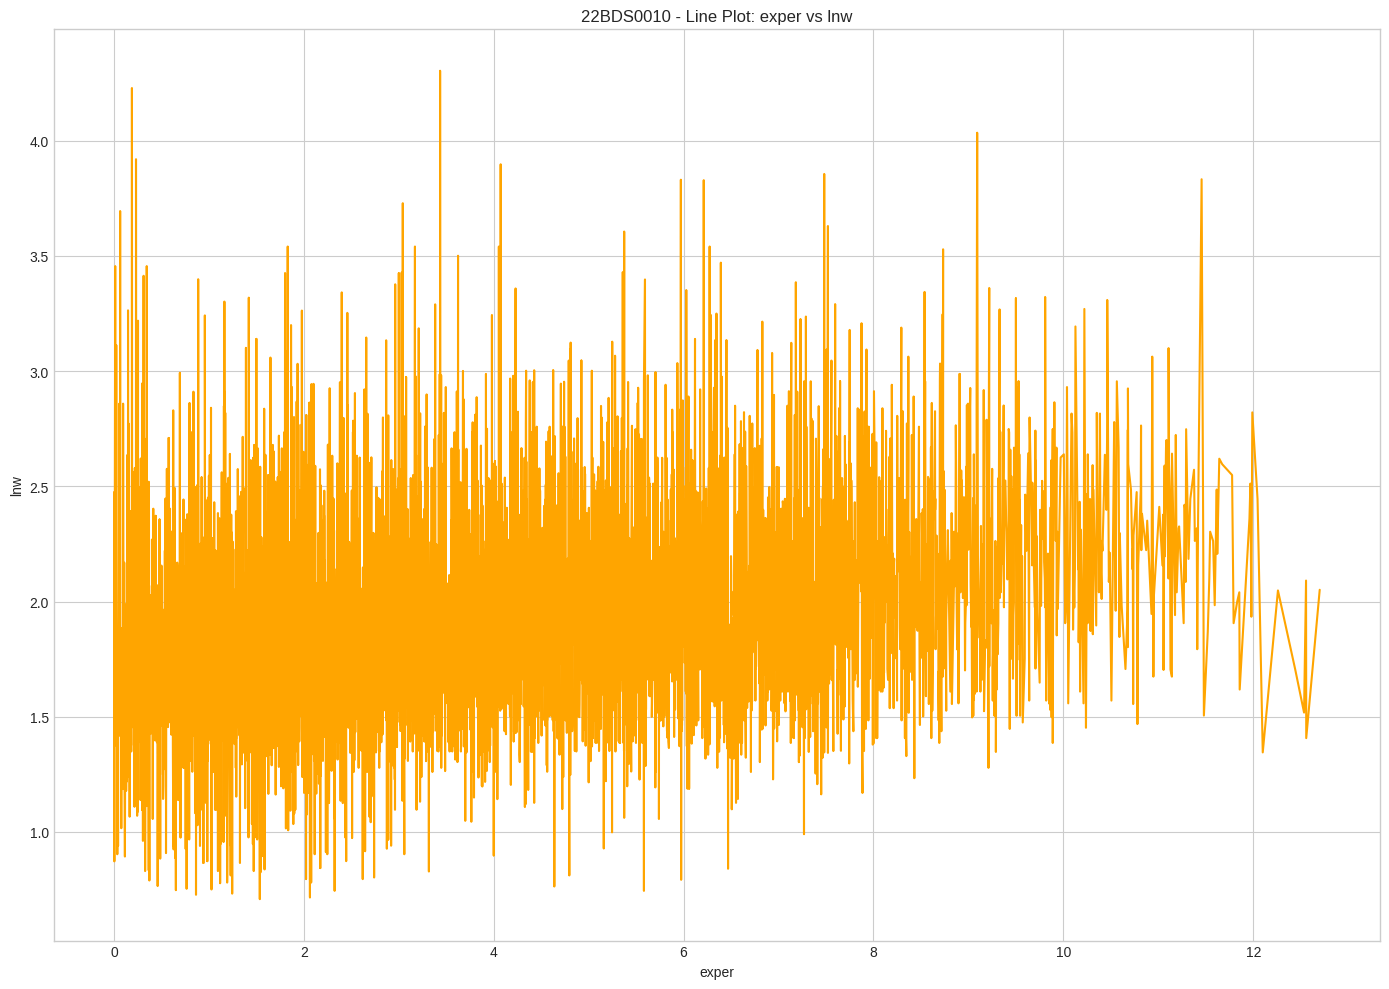

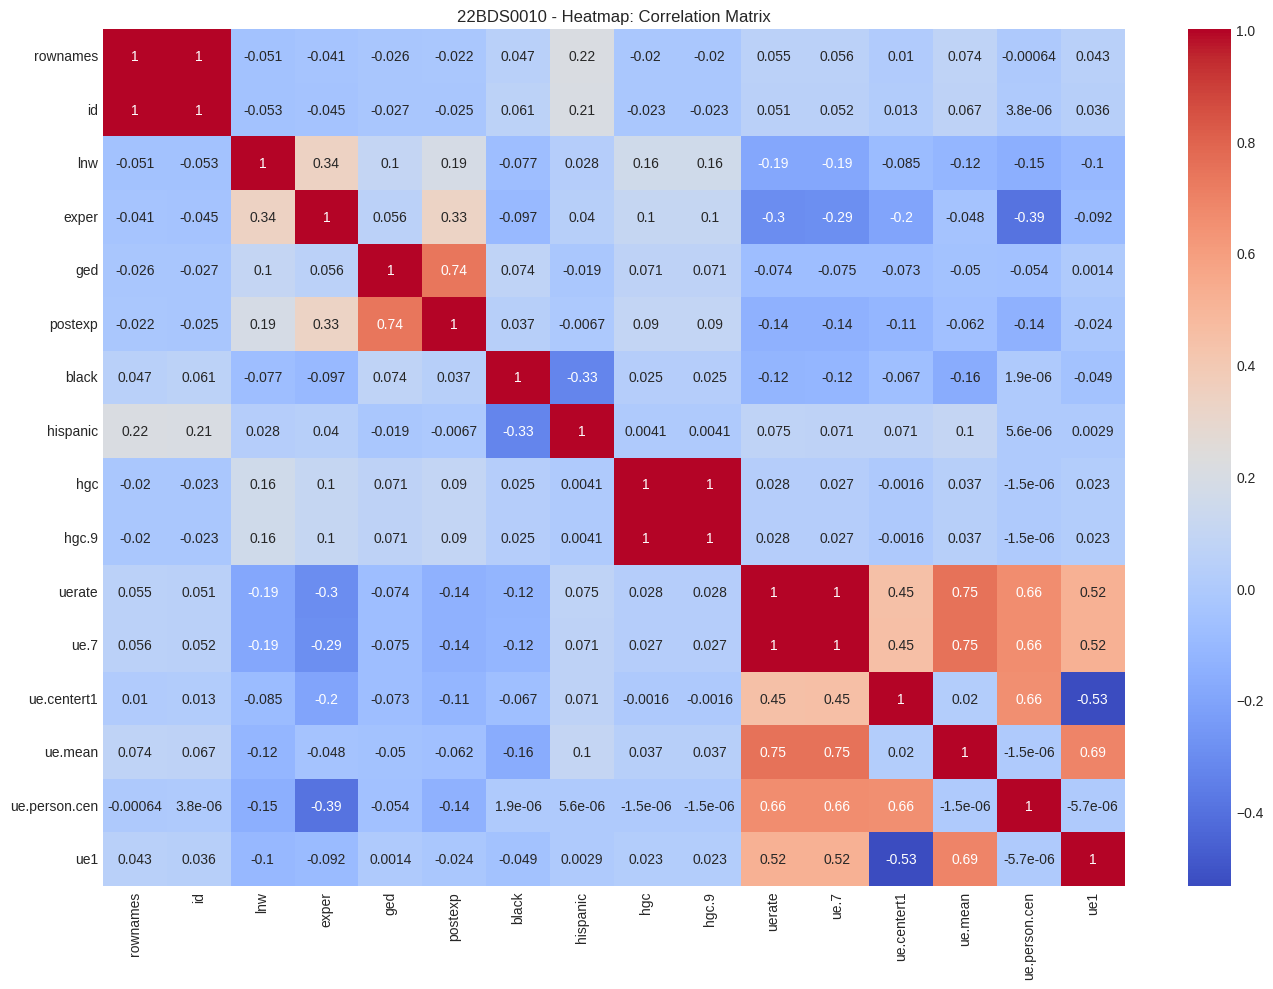

In [ ]:
sns.scatterplot(x='lnw', y='exper', data=df, color='teal')
plt.title('22BDS0010 - Scatter Plot: lnw vs exper')
plt.tight_layout()
plt.show()


df_sorted = df.sort_values('exper')
plt.plot(df_sorted['exper'], df_sorted['lnw'], color='orange')
plt.title('22BDS0010 - Line Plot: exper vs lnw')
plt.xlabel('exper')
plt.ylabel('lnw')
plt.tight_layout()
plt.show()


correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('22BDS0010 - Heatmap: Correlation Matrix')
plt.tight_layout()
plt.show()


#Step 5 Multivariate Analysis

## 5.1 Scatter Plot

### 5.1.1 Color as 3rd parameter


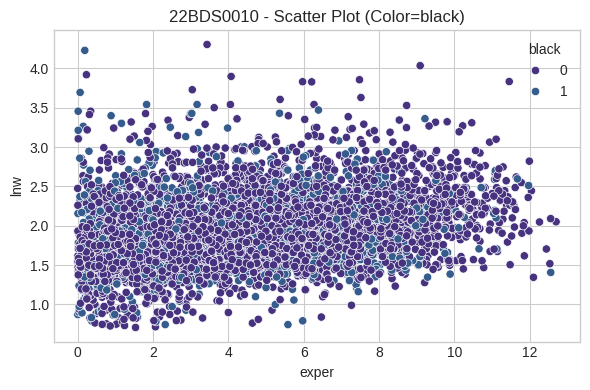

In [434]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='exper', y='lnw', hue='black')
plt.title('22BDS0010 - Scatter Plot (Color=black)')
plt.tight_layout()
plt.show()


### 5.1.2 Size as 3rd Parameter

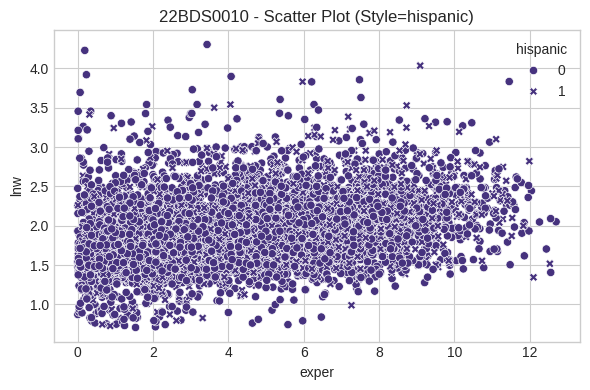

In [435]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='exper', y='lnw', style='hispanic')
plt.title('22BDS0010 - Scatter Plot (Style=hispanic)')
plt.tight_layout()
plt.show()


### 5.1.3 Size as 3rd Parameter

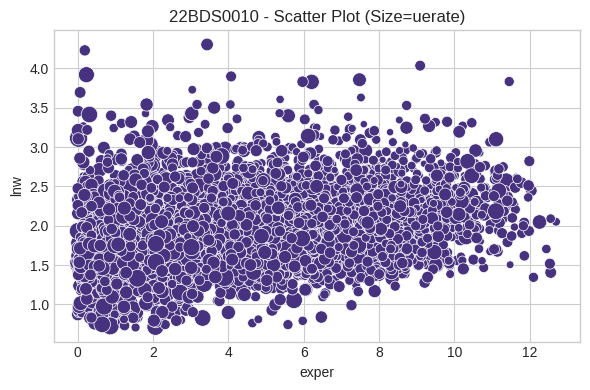

In [436]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='exper', y='lnw', size='uerate', sizes=(20, 200), legend=False)
plt.title('22BDS0010 - Scatter Plot (Size=uerate)')
plt.tight_layout()
plt.show()


## 5.2 Bubble Plot

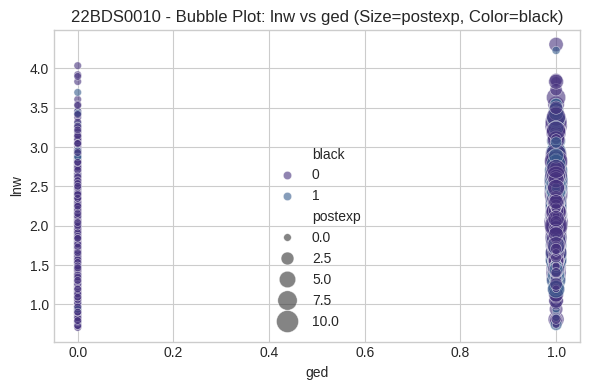

In [437]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='ged', y='lnw', size='postexp', hue='black', alpha=0.6, sizes=(30, 300))
plt.title('22BDS0010 - Bubble Plot: lnw vs ged (Size=postexp, Color=black)')
plt.tight_layout()
plt.show()


## 5.3 Faceted Histogram

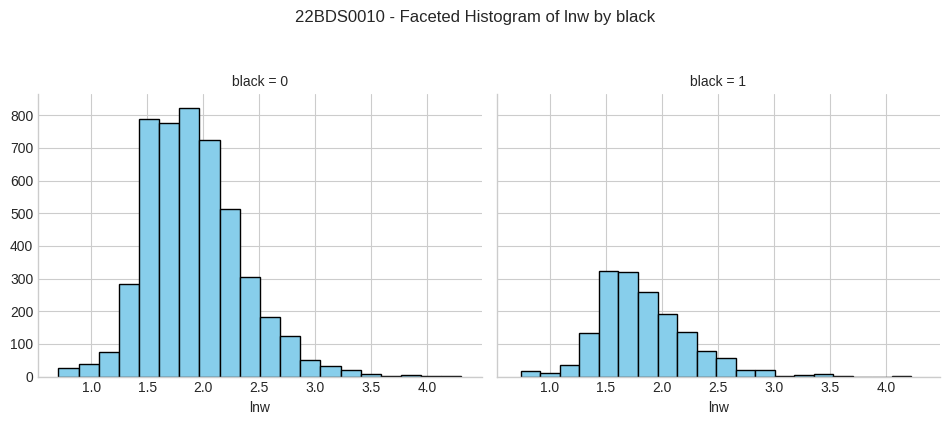

In [ ]:
g = sns.FacetGrid(df, col='black', height=4, aspect=1.2)
g.map(plt.hist, 'lnw', bins=20, color='skyblue', edgecolor='black')
g.fig.suptitle('22BDS0010 - Faceted Histogram of lnw by black', y=1.05)
plt.tight_layout()
plt.show()


## 5.4 Pair Plot

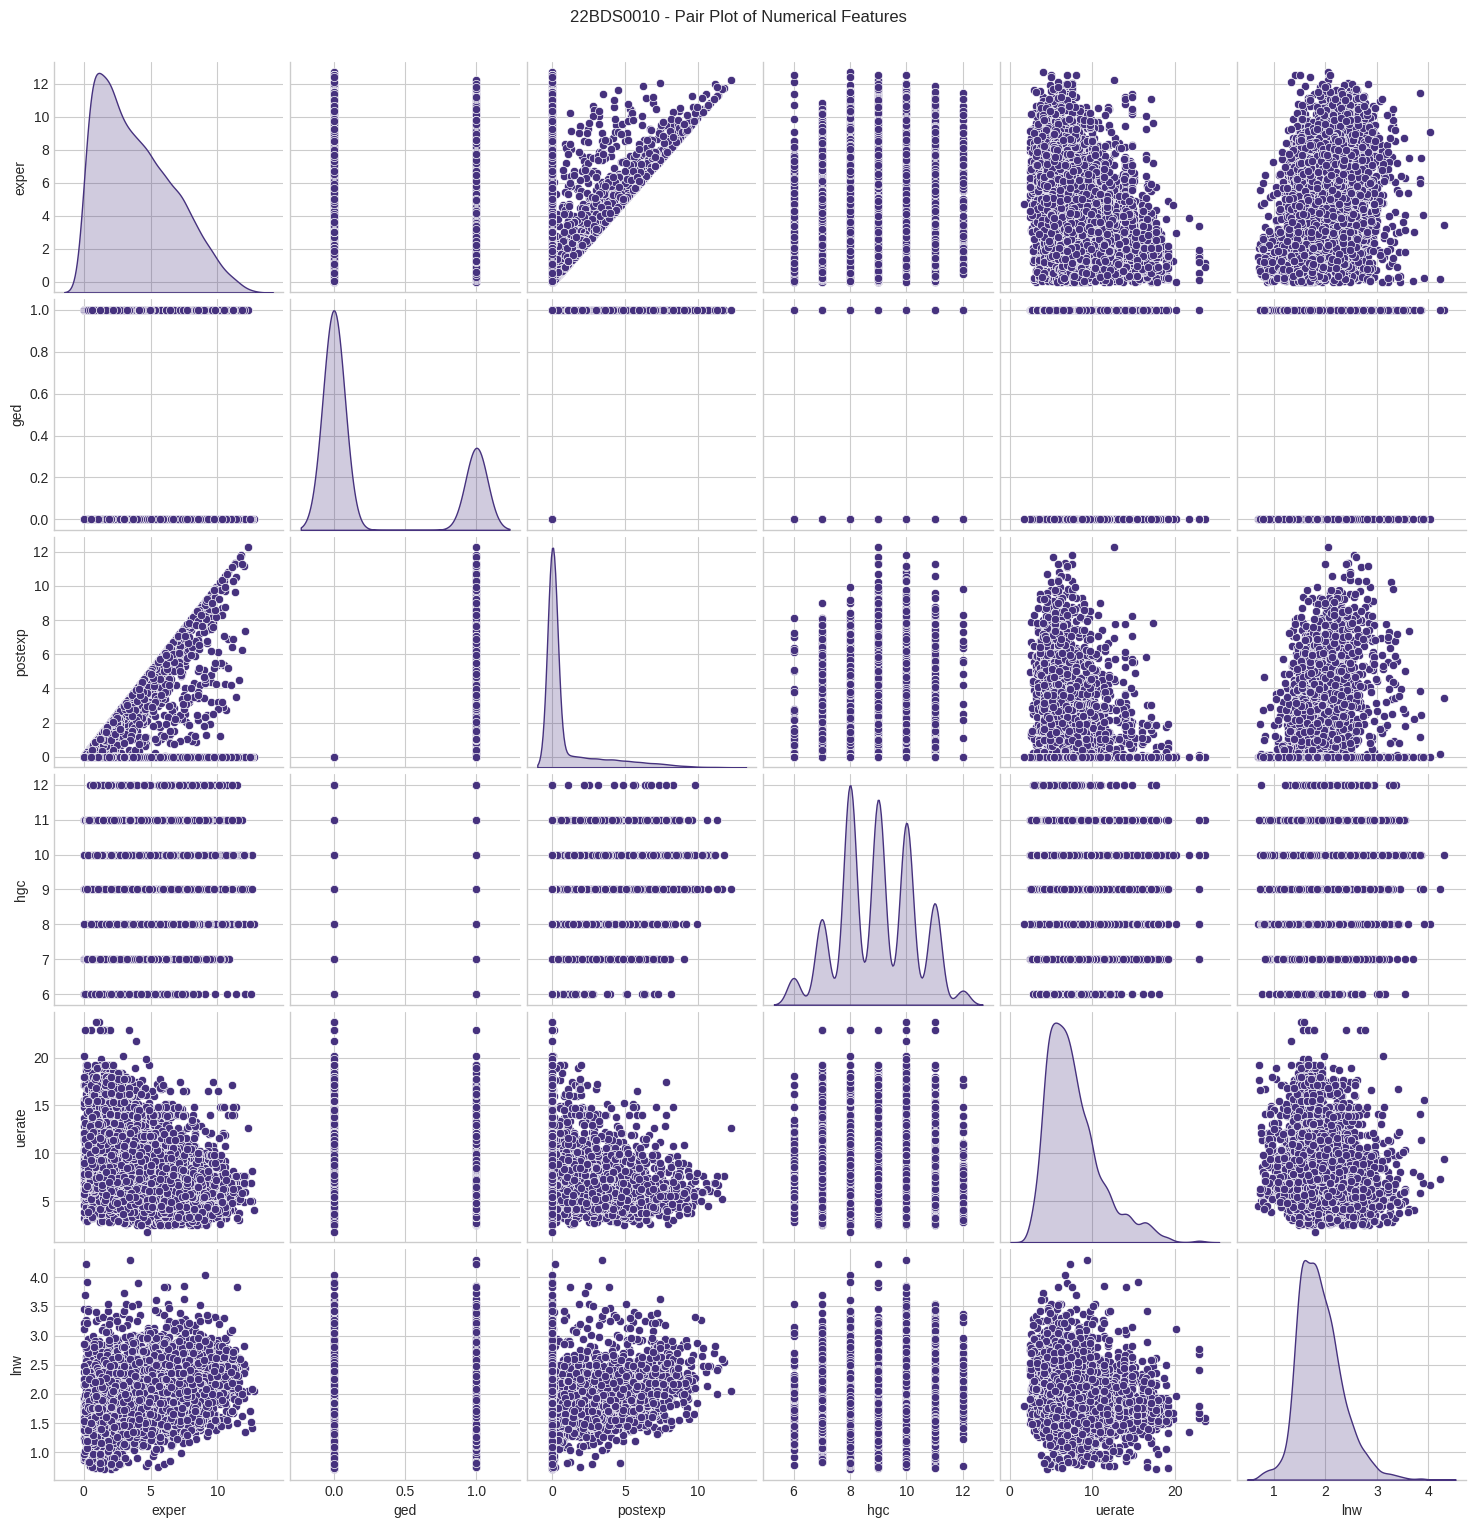

In [ ]:
sns.pairplot(df[['exper', 'ged', 'postexp', 'hgc', 'uerate', 'lnw']], diag_kind='kde')
plt.suptitle('22BDS0010 - Pair Plot of Numerical Features', y=1.02)
plt.show()


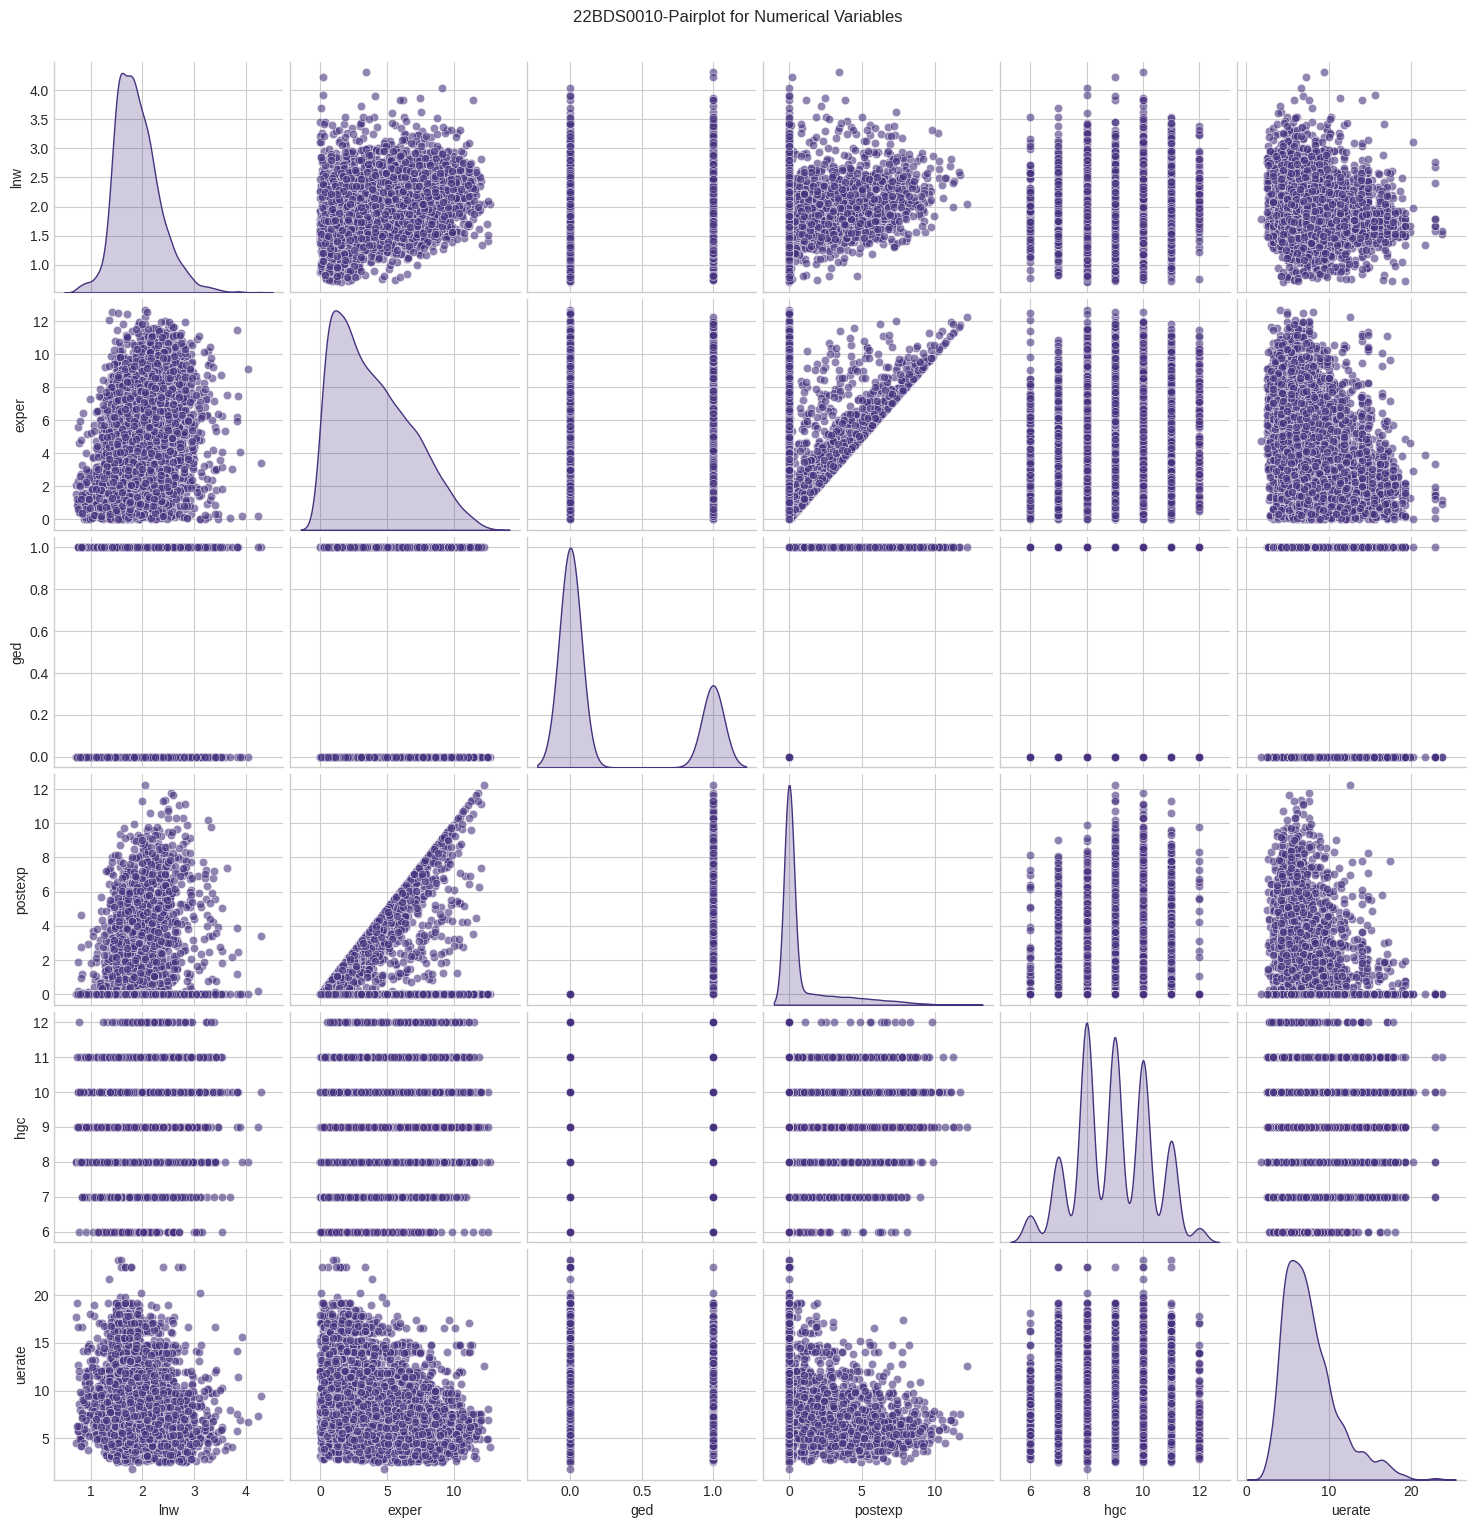

In [ ]:
sns.pairplot(df[['lnw', 'exper', 'ged', 'postexp', 'hgc', 'uerate']], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('22BDS0010-Pairplot for Numerical Variables', y=1.02)
plt.show()


## 5.5 Heat Map

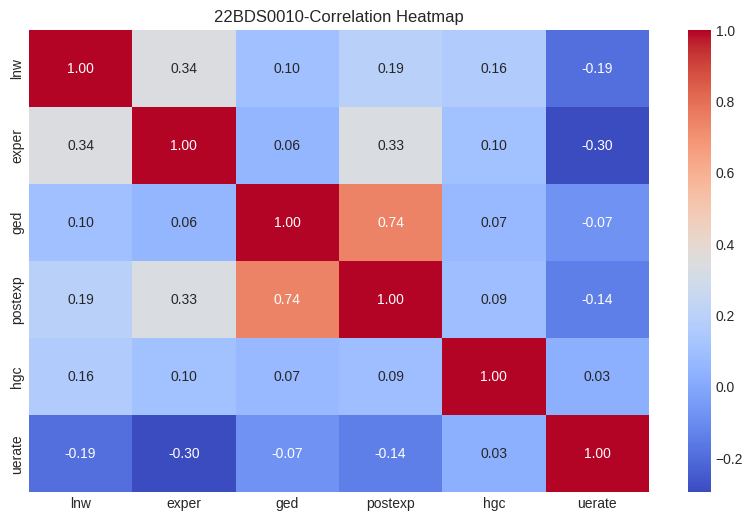

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['lnw', 'exper', 'ged', 'postexp', 'hgc', 'uerate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('22BDS0010-Correlation Heatmap')
plt.show()


# Step 6 Time Series Analysis

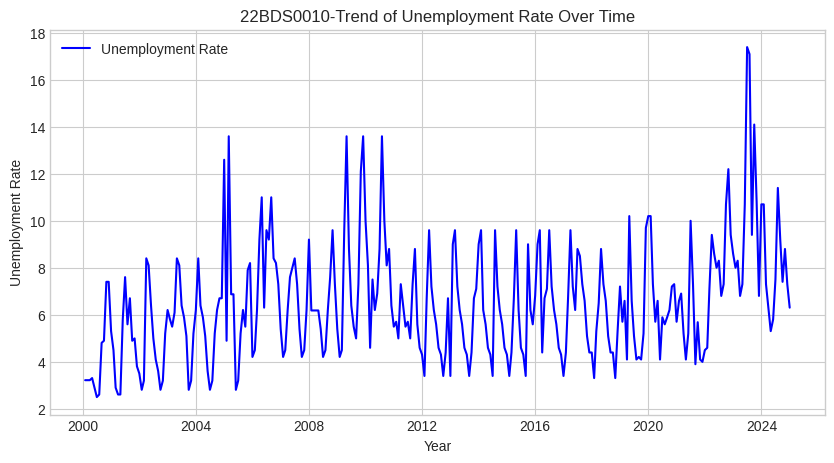

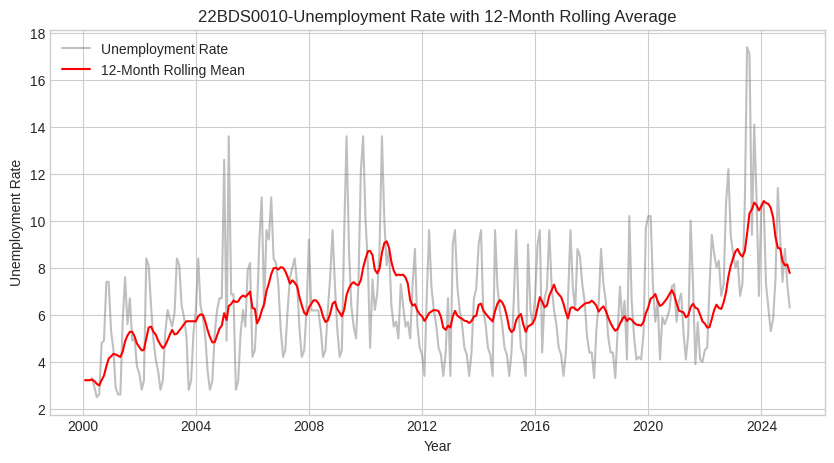

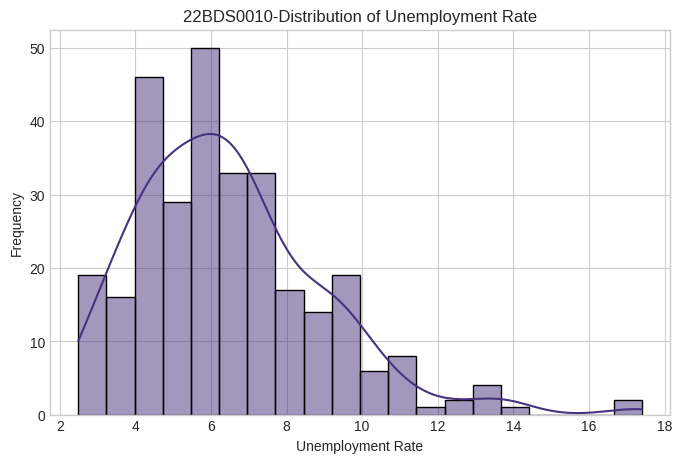

In [ ]:
#Time Index & Trend Assumption – Data was assumed to be monthly from January 2000, with a 12-month rolling average used for trend smoothing.
#Seasonality Assumption – A 12-month seasonal pattern was assumed, and seasonal decomposition was applied.
num_rows = min(len(df), 300)  # Assuming max 25 years of monthly data

df = df.iloc[:num_rows].copy()
df.loc[:, "Date"] = pd.date_range(start="2000-01-01", periods=len(df), freq="ME")
df.set_index("Date", inplace=True)

# Plot 1: Trend of Unemployment Rate
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["uerate"], label="Unemployment Rate", color="b")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("22BDS0010-Trend of Unemployment Rate Over Time")
plt.legend()
plt.show()

# Plot 2: Rolling Mean of Unemployment Rate
df.loc[:, "Rolling Mean"] = df["uerate"].rolling(window=12, min_periods=1).mean()
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["uerate"], label="Unemployment Rate", color="gray", alpha=0.5)
plt.plot(df.index, df["Rolling Mean"], label="12-Month Rolling Mean", color="r")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("22BDS0010-Unemployment Rate with 12-Month Rolling Average")
plt.legend()
plt.show()

# Plot 3: Histogram of Unemployment Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["uerate"], bins=20, kde=True)
plt.xlabel("Unemployment Rate")
plt.ylabel("Frequency")
plt.title("22BDS0010-Distribution of Unemployment Rate")
plt.show()

# Step 7 1-D Statistical Analysis

## 7.1 Measure of Central tendency

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode




lnw = df['lnw']




mean = np.mean(lnw)
median = np.median(lnw)
alpha_mean = mean



print("=== Measures of Central Tendency ===")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Alpha Mean: {alpha_mean:.4f}")

print("\n=== Quantiles and Deciles ===")
print(f"25th, 50th, 75th Percentiles: {quantiles}")
print(f"Deciles (10% to 90%): {deciles}")

quantiles = np.percentile(lnw, [25, 50, 75])
deciles = np.percentile(lnw, np.arange(10, 100, 10))



skewness = skew(lnw)
kurtosis_value = kurtosis(lnw)



print("\n=== Shape of the Distribution ===")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis (Excess): {kurtosis_value:.4f}")





=== Measures of Central Tendency ===
Mean: 1.9533
Median: 1.9190
Alpha Mean: 1.9533

=== Quantiles and Deciles ===
25th, 50th, 75th Percentiles: [1.6255 1.919  2.224 ]
Deciles (10% to 90%): [1.491  1.566  1.704  1.8076 1.919  2.0274 2.1592 2.263  2.4631]

=== Shape of the Distribution ===
Skewness: 0.6996
Kurtosis (Excess): 1.9854


## 7.2 Measure of Dispersion

In [ ]:
range_value = np.ptp(lnw)
iqr = quantiles[2] - quantiles[0]
mean_diff = np.mean(np.abs(lnw - mean))
std_dev = np.std(lnw)
variance = np.var(lnw)

print("\n=== Measures of Dispersion ===")
print(f"Range: {range_value:.4f}")
print(f"IQR (Q3 - Q1): {iqr:.4f}")
print(f"Mean Absolute Deviation: {mean_diff:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Variance: {variance:.4f}")



=== Measures of Dispersion ===
Range: 3.2720
IQR (Q3 - Q1): 0.5985
Mean Absolute Deviation: 0.3277
Standard Deviation: 0.4198
Variance: 0.1762


## 7.3 Measure of FRequency

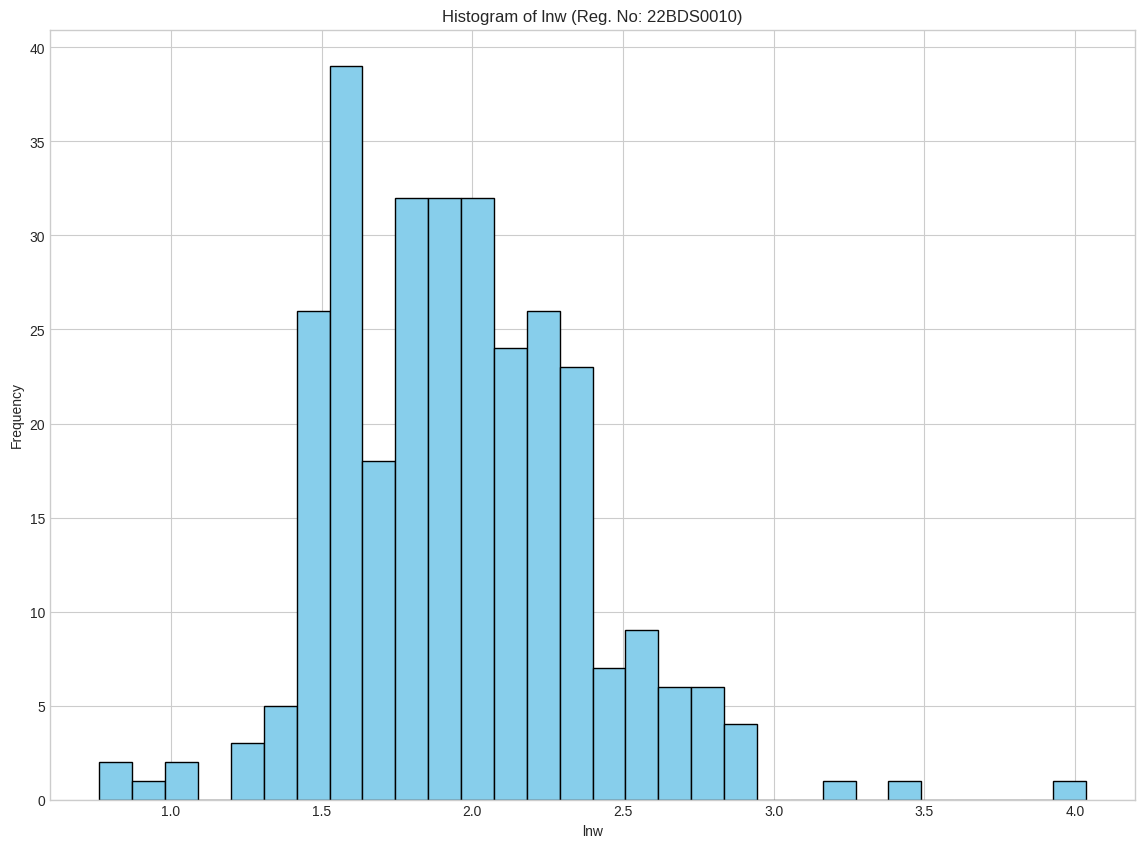

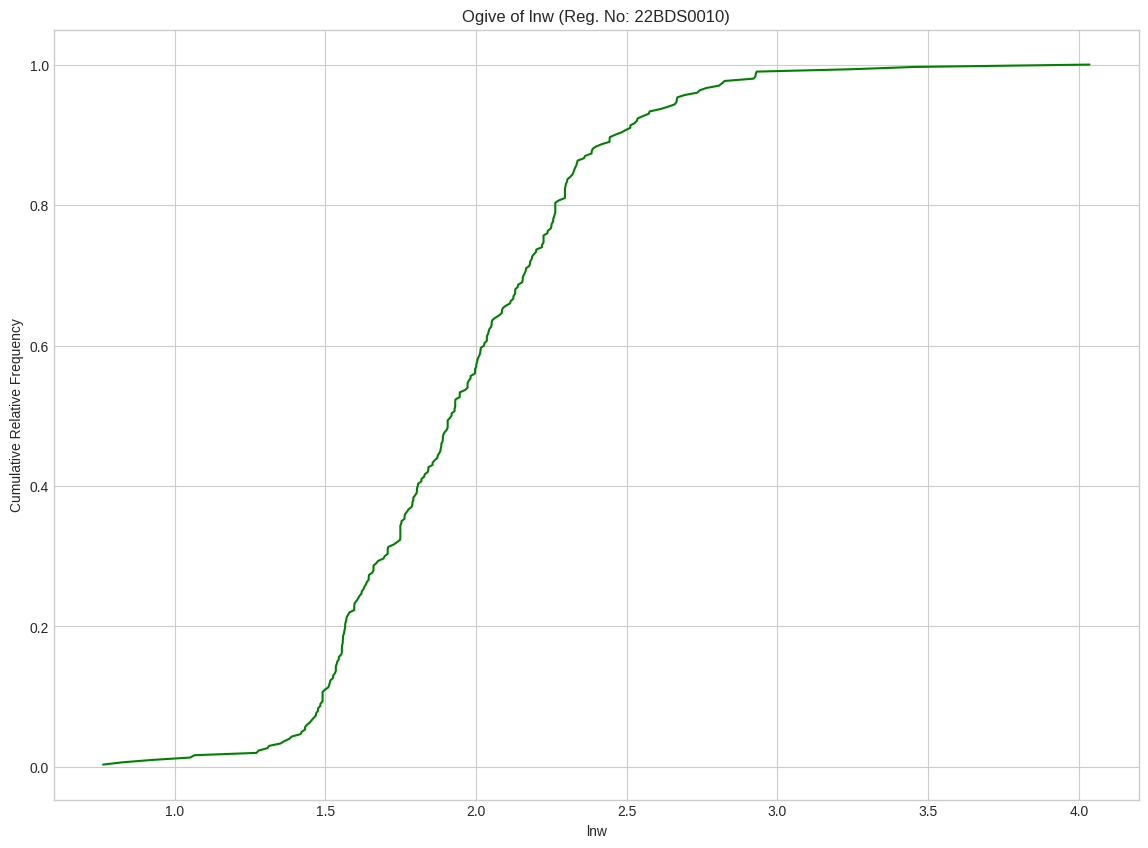

Measures of Central Tendency:
Mean: 1.9533099999999999
Geometric Mean: 1.850038686616041
Quantiles (25%, 50%, 75%): [1.6255 1.919  2.224 ]
Deciles: [1.491  1.566  1.704  1.8076 1.919  2.0274 2.1592 2.263  2.4631]

Measures of Dispersion:
Range: 3.2720000000000002
IQR: 0.5985000000000003
Mean Difference: 0.32771066666666665
Standard Deviation: 0.41981756422681193
Variance: 0.17624678723333337
Skewness: 0.6996017145683703
Kurtosis: 1.9853747318990997


In [ ]:

plt.hist(lnw, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of lnw (Reg. No: 22BDS0010)')
plt.xlabel('lnw')
plt.ylabel('Frequency')
plt.show()

sorted_lnw = np.sort(lnw)
cumulative_freq = np.arange(1, len(sorted_lnw) + 1) / len(sorted_lnw)
plt.plot(sorted_lnw, cumulative_freq, color='green')
plt.title('Ogive of lnw (Reg. No: 22BDS0010)')
plt.xlabel('lnw')
plt.ylabel('Cumulative Relative Frequency')
plt.show()



print("Measures of Central Tendency:")
print(f"Mean: {mean}")

print(f"Geometric Mean: {geom_mean}")

print(f"Quantiles (25%, 50%, 75%): {quantiles}")
print(f"Deciles: {deciles}")

print("\nMeasures of Dispersion:")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Mean Difference: {mean_diff}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis_value}")

## 7.4 Stacked Barplot and Box Plot

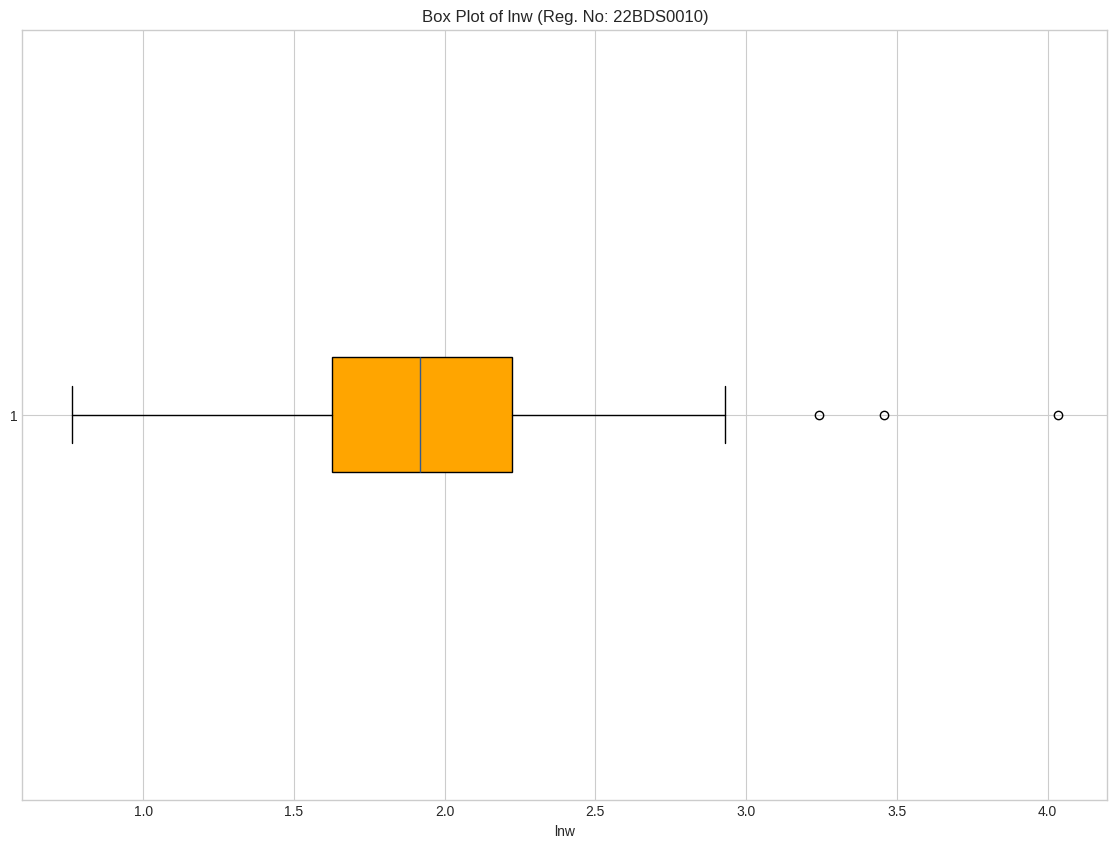

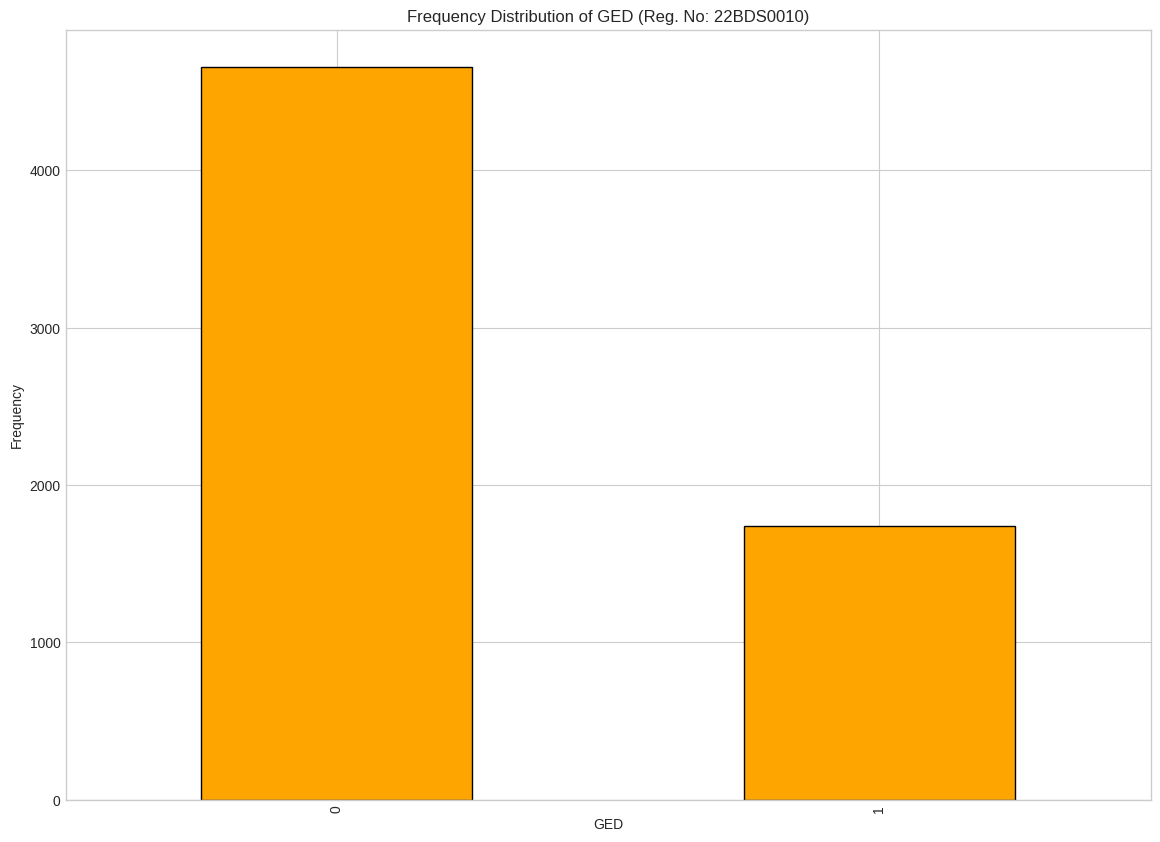

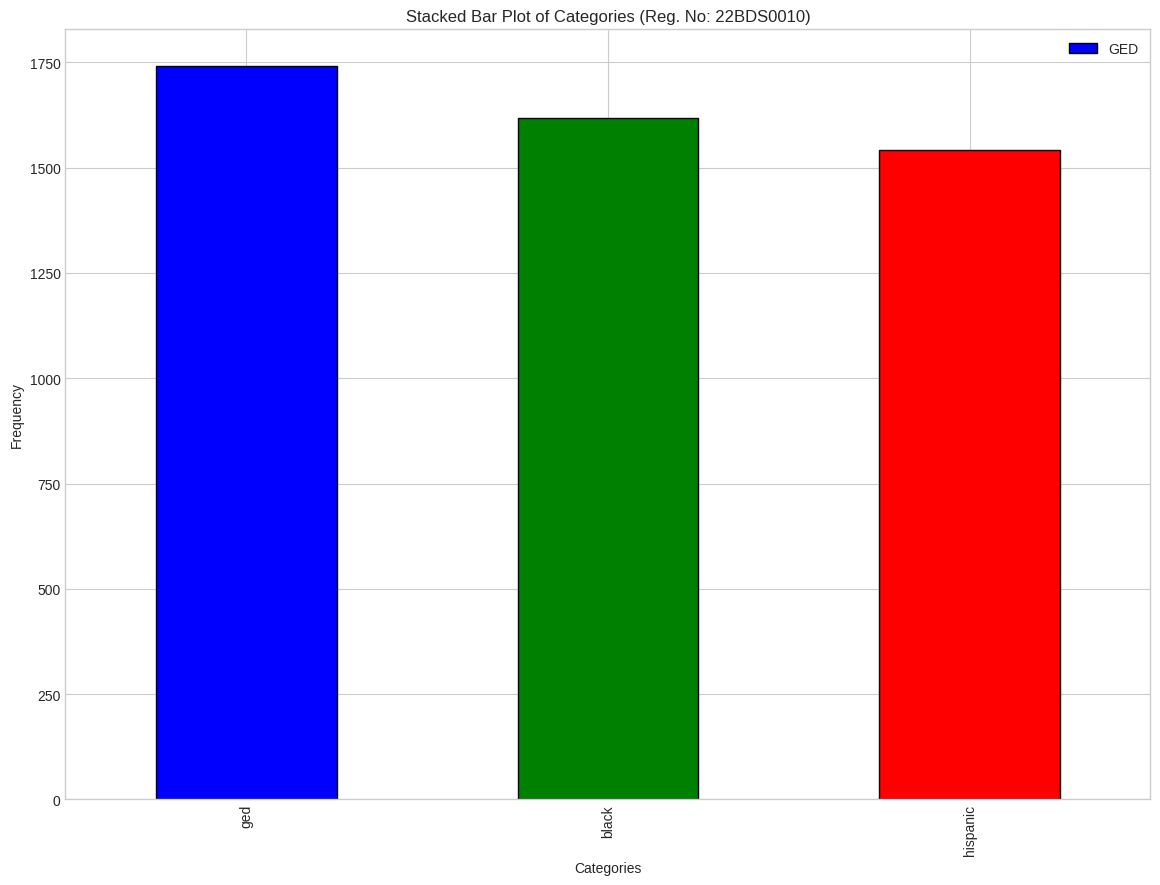

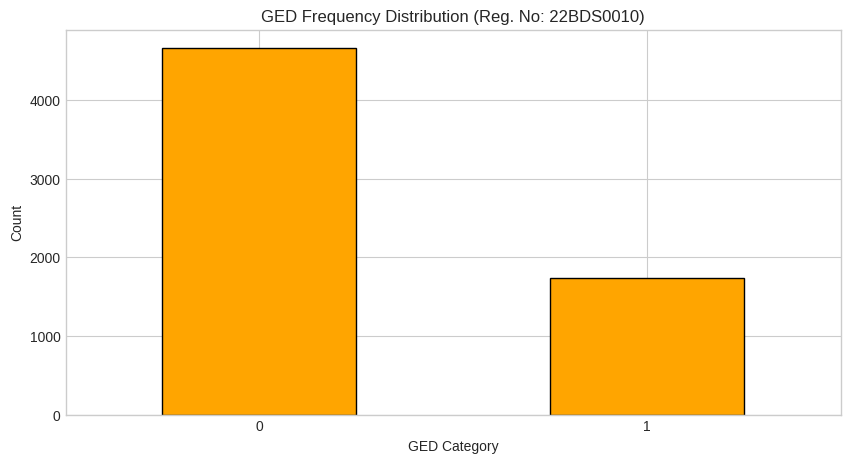

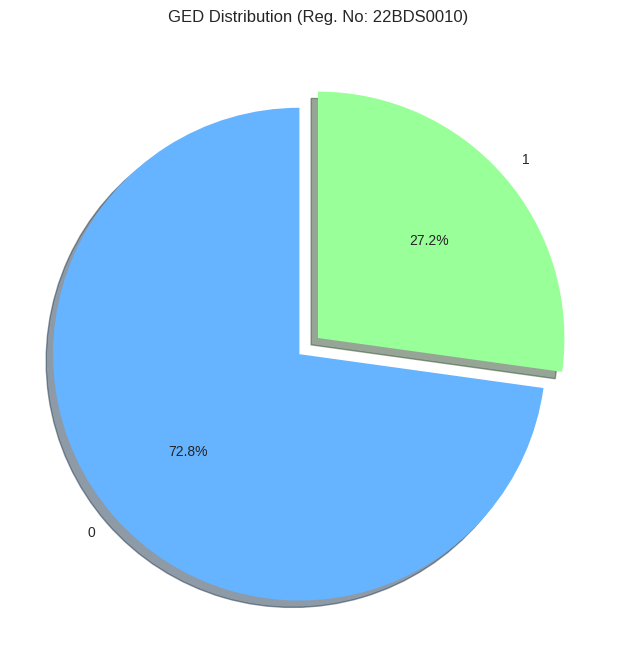

In [ ]:
df = pd.read_csv(url)
plt.boxplot(lnw, vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Box Plot of lnw (Reg. No: 22BDS0010)')
plt.xlabel('lnw')
plt.show()


ged_counts = df['ged'].value_counts()
ged_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Frequency Distribution of GED (Reg. No: 22BDS0010)')
plt.xlabel('GED')
plt.ylabel('Frequency')
plt.show()


categories = df[['ged', 'black', 'hispanic']].sum()
categories.plot(kind='bar', stacked=True, color=['blue', 'green', 'red'], edgecolor='black')
plt.title('Stacked Bar Plot of Categories (Reg. No: 22BDS0010)')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.legend(['GED', 'Black', 'Hispanic'])
plt.show()



plt.figure(figsize=(10, 5))
ged_counts = df['ged'].value_counts()
ged_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('GED Frequency Distribution (Reg. No: 22BDS0010)')
plt.xlabel('GED Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


plt.figure(figsize=(8, 8))
explode = [0.1] + [0]*(len(ged_counts)-1)
ged_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                colors=['#66b3ff','#99ff99','#ffcc99'],
                explode=explode, shadow=True)
plt.title('GED Distribution (Reg. No: 22BDS0010)')
plt.ylabel('')
plt.show()

# Step 8 2D Statistical Analysis

## 8.1 Scatter plot with trend line

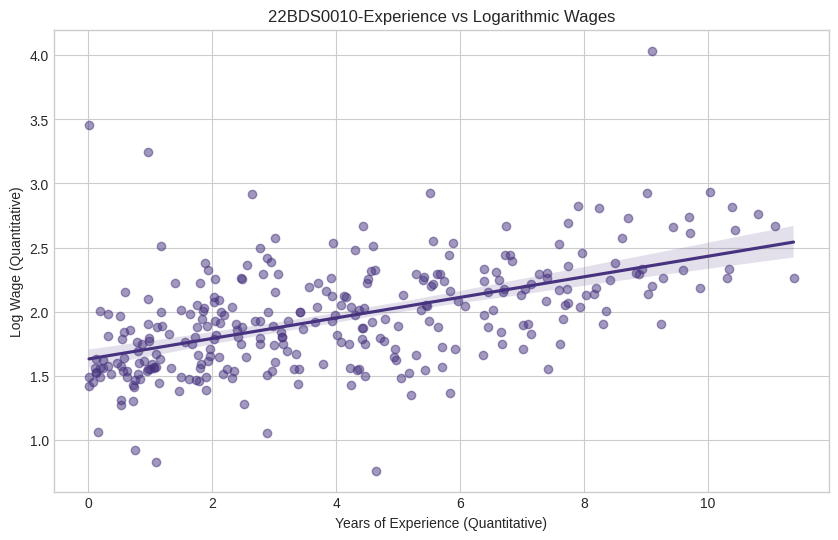

Pearson Correlation Coefficient: 0.539


In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='exper', y='lnw', data=df, scatter_kws={'alpha':0.5})
plt.title("22BDS0010-Experience vs Logarithmic Wages")
plt.xlabel('Years of Experience (Quantitative)')
plt.ylabel('Log Wage (Quantitative)')
plt.show()


correlation = df[['exper', 'lnw']].corr().iloc[0,1]
print(f"Pearson Correlation Coefficient: {correlation:.3f}")

## 8.2 2-D Analysis of Quantitative & Categorical Variables

<ipython-input-381-7d46e07c839b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1200x600 with 0 Axes>

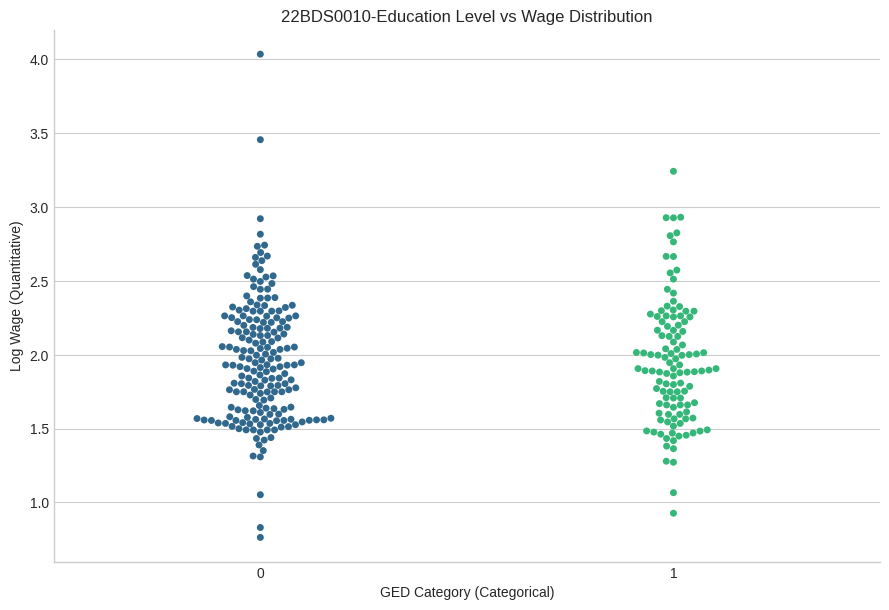

<ipython-input-381-7d46e07c839b>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




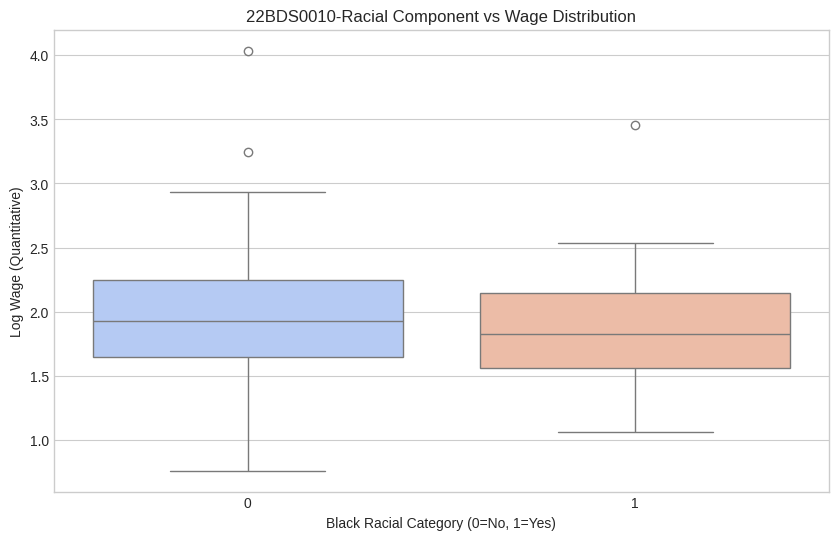

In [ ]:

plt.figure(figsize=(12, 6))
sns.catplot(data=df, x='ged', y='lnw', kind='swarm',
            height=6, aspect=1.5, palette='viridis')
plt.title("22BDS0010-Education Level vs Wage Distribution")
plt.xlabel('GED Category (Categorical)')
plt.ylabel('Log Wage (Quantitative)')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='black', y='lnw', palette='coolwarm')
plt.title("22BDS0010-Racial Component vs Wage Distribution")
plt.xlabel('Black Racial Category (0=No, 1=Yes)')
plt.ylabel('Log Wage (Quantitative)')
plt.show()


## 8.3 Chi Square Test


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['ged'], df['black'])


chi2, p_val, dof, expected = chi2_contingency(contingency_table)


print("Chi-square Test Results")
print("------------------------")
print(f"Chi-square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_val}")
print("\nExpected Frequencies:\n", expected)
print("\nContingency Table:\n", contingency_table)

Chi-square Test Results
------------------------
Chi-square Statistic: 3.0765017671123918
Degrees of Freedom: 1
P-value: 0.07943120236007575

Expected Frequencies:
 [[156.86  29.14]
 [ 96.14  17.86]]

Contingency Table:
 black    0   1
ged           
0      151  35
1      102  12


## 8.4 Sunray Plot

In [ ]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['ged', 'black', 'hispanic'],  # Hierarchical levels
    title="Sun Ray Plot (Sunburst Chart) - 22BDS0010"
)

fig.show()

# Step 9 3D and Nd Statistical Analysis

## 9.1 Joint 3D Analysis of Quantitative and Two Categorical Variables

In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


pivot = df.pivot_table(values='lnw', index='ged', columns='black', aggfunc='mean')

fig = px.imshow(pivot, text_auto=True, color_continuous_scale='Blues',
                labels=dict(x="black", y="ged", color="Mean lnw"),
                title="Joint 3D Analysis - lnw by ged and black (22BDS0010)")
fig.show()



## 9.2  Stereogram: 3D Bar Plot of the Above Table

In [439]:

pivot = df.pivot_table(values='lnw', index='ged', columns='black', aggfunc='mean')


x_vals = pivot.columns.tolist()
y_vals = pivot.index.tolist()

x, y, z, height = [], [], [], []

for i, row_cat in enumerate(y_vals):
    for j, col_cat in enumerate(x_vals):
        x.append(str(col_cat))
        y.append(str(row_cat))
        z.append(0)
        height.append(pivot.loc[row_cat, col_cat])


fig = go.Figure()

for i in range(len(x)):
    fig.add_trace(go.Scatter3d(
        x=[x[i], x[i]],
        y=[y[i], y[i]],
        z=[0, height[i]],
        mode='lines',
        line=dict(color='blue', width=10),
        showlegend=False
    ))

fig.update_layout(
    title="Stereogram (Simulated 3D Bar Plot) of lnw by ged and black - 22BDS0010",
    scene=dict(
        xaxis_title="black",
        yaxis_title="ged",
        zaxis_title="Mean lnw"
    )
)

fig.show()

## 9.3 Dispersion Box Plots Based on Two Categorical Variables

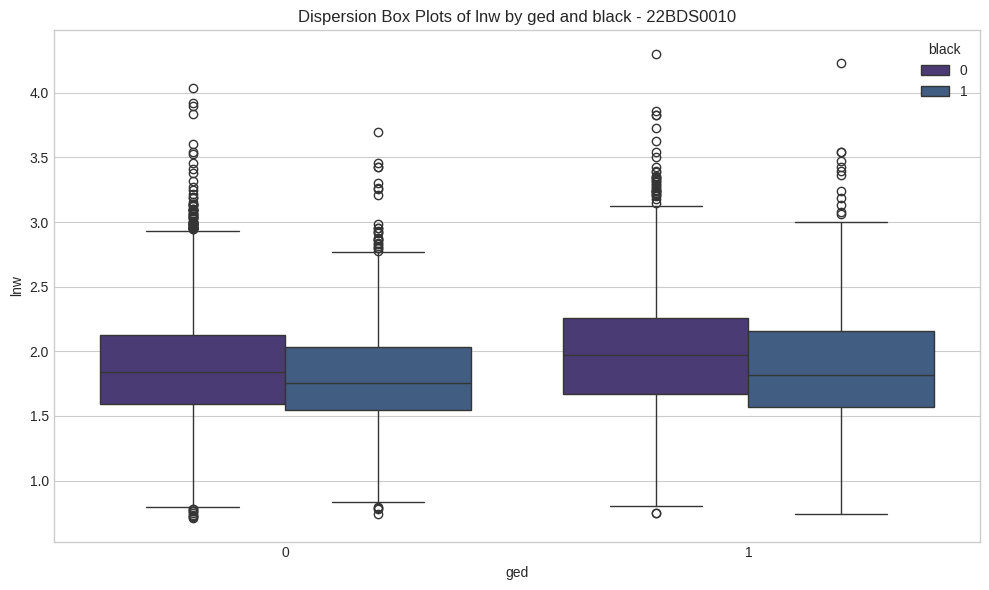

In [440]:



plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ged', y='lnw', hue='black')
plt.title("Dispersion Box Plots of lnw by ged and black - 22BDS0010")
plt.tight_layout()
plt.show()




## 9.4 Joint 3D Analysis of a Categorical Variable and Two Quantitative Variables


In [441]:

fig = px.scatter_3d(df,
                    x='exper',
                    y='lnw',
                    z='hgc',
                    color=df['black'].astype(str),
                    title="3D Scatter: black vs exper, lnw & hgc (22BDS0010)",
                    labels={'black': 'Black'})
fig.show()

Module 5

# Step 10 Heirarchial Clustering



## 10.1 Import the required libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from scipy.stats import skew, kurtosis


## 10.2 Feature Selection and Scaling

In [ ]:
existing_cols = [col for col in numeric_cols if col in df.columns]
df_clean = df[existing_cols].fillna(df[existing_cols].mean())
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


## 10.3 Dendrogram Plotting Function

In [430]:



def plot_dendrogram(Z, labels, title, max_d=None, show_leaf_labels=False):
    plt.figure(figsize=(14, 6))
    plt.title(f"{title} | Reg No: 22BDS0010", fontsize=14)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=8.,
        no_labels=not show_leaf_labels,
        color_threshold=max_d if max_d else None
    )

    if max_d:
        plt.axhline(y=max_d, c='k', linestyle='--', label=f'Cut at distance = {max_d}')
        plt.legend()

    plt.tight_layout()
    plt.show()




## 10.4 Setting Up Clusters

In [ ]:
metrics = ['euclidean', 'manhattan', 'correlation', 'cosine', 'chebyshev']
linkage_methods = ['single', 'complete', 'average', 'ward']
results = {}





## 10.5 Clusters Visualization


SINGLE LINKAGE METHOD:


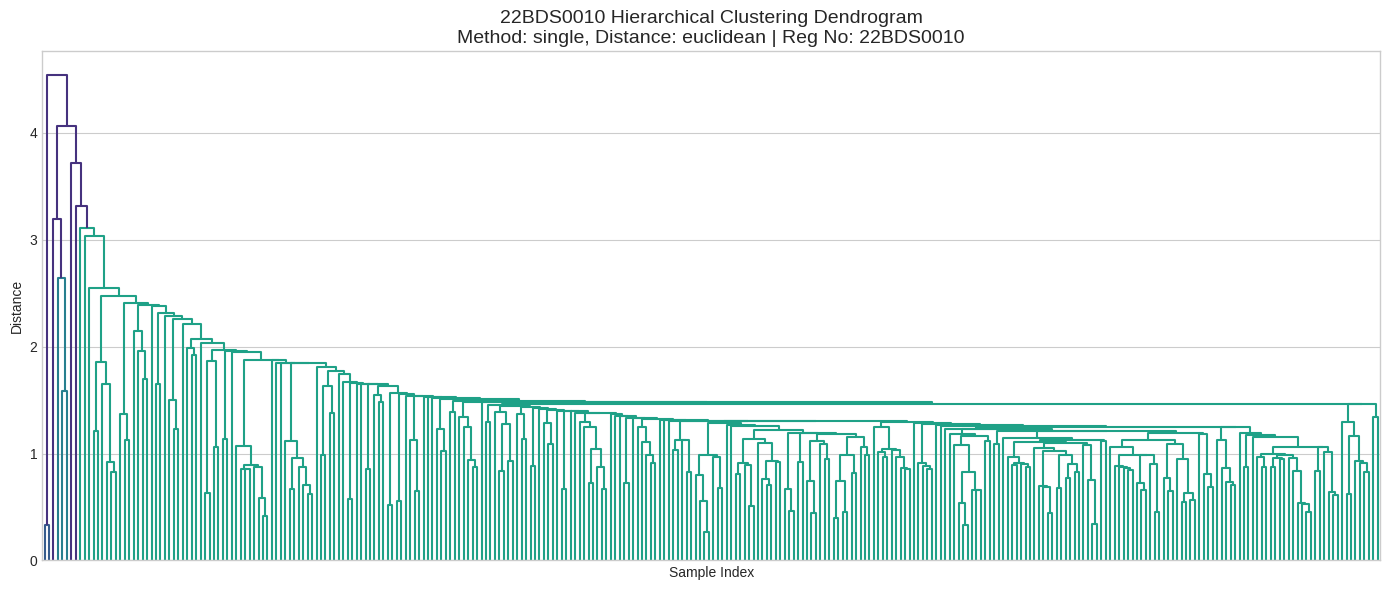

  - euclidean distance, 2 clusters: Silhouette Score = 0.5216
  - euclidean distance, 3 clusters: Silhouette Score = 0.4126
  - euclidean distance, 4 clusters: Silhouette Score = 0.2905
  - euclidean distance, 5 clusters: Silhouette Score = 0.1658
  => Optimal clusters with euclidean: 2, Silhouette: 0.5216


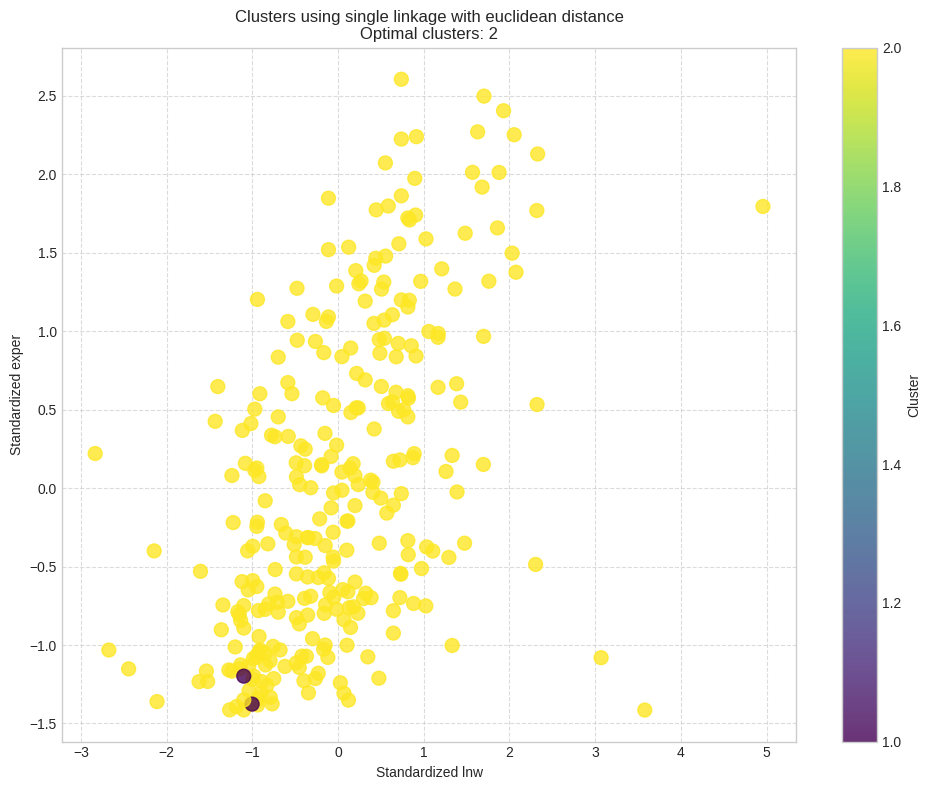

  Error with manhattan distance: Unknown Distance Metric: manhattan


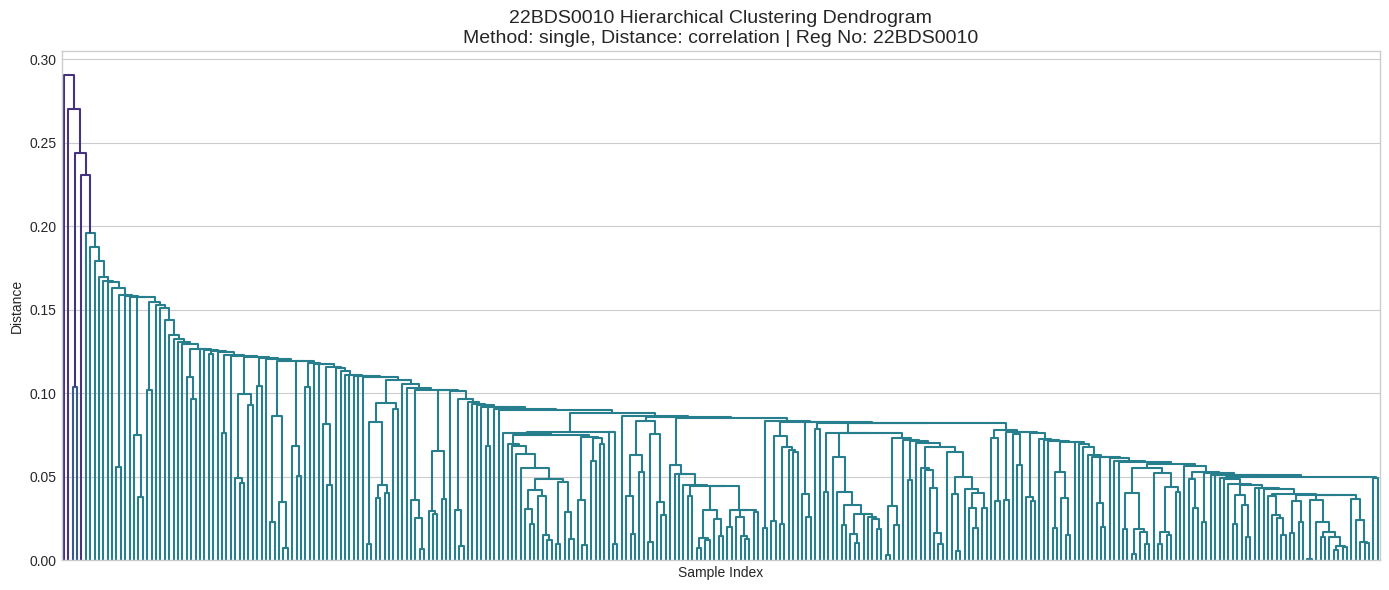

  - correlation distance, 2 clusters: Silhouette Score = -0.1714
  - correlation distance, 3 clusters: Silhouette Score = -0.2930
  - correlation distance, 4 clusters: Silhouette Score = -0.3111
  - correlation distance, 5 clusters: Silhouette Score = -0.3186
  => Optimal clusters with correlation: 2, Silhouette: -0.1714


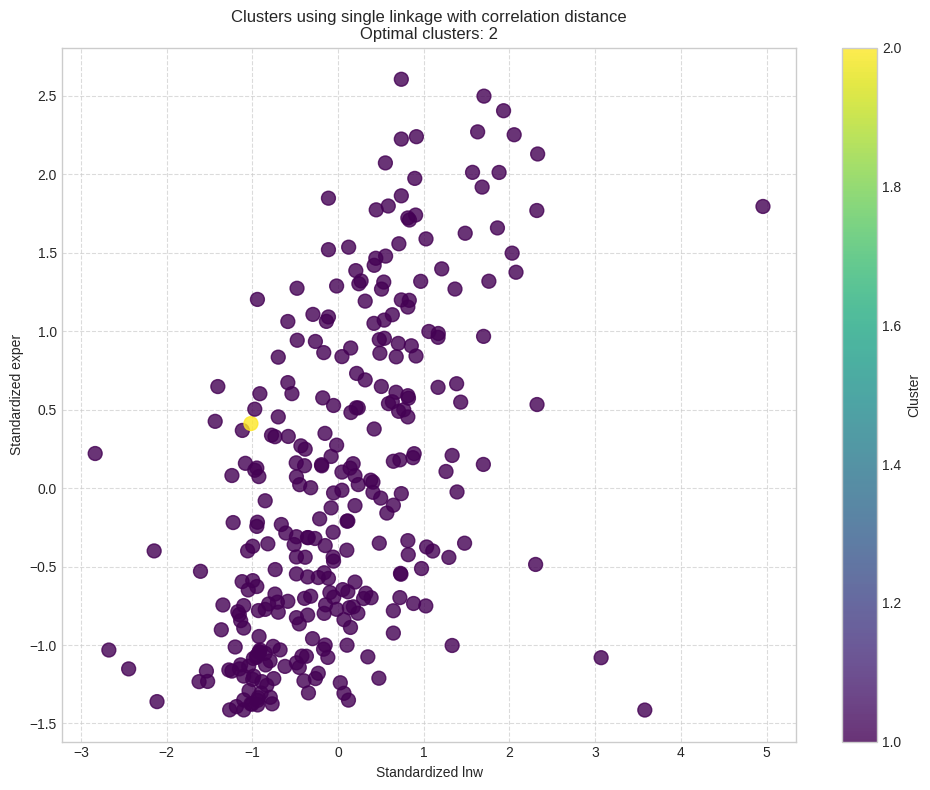

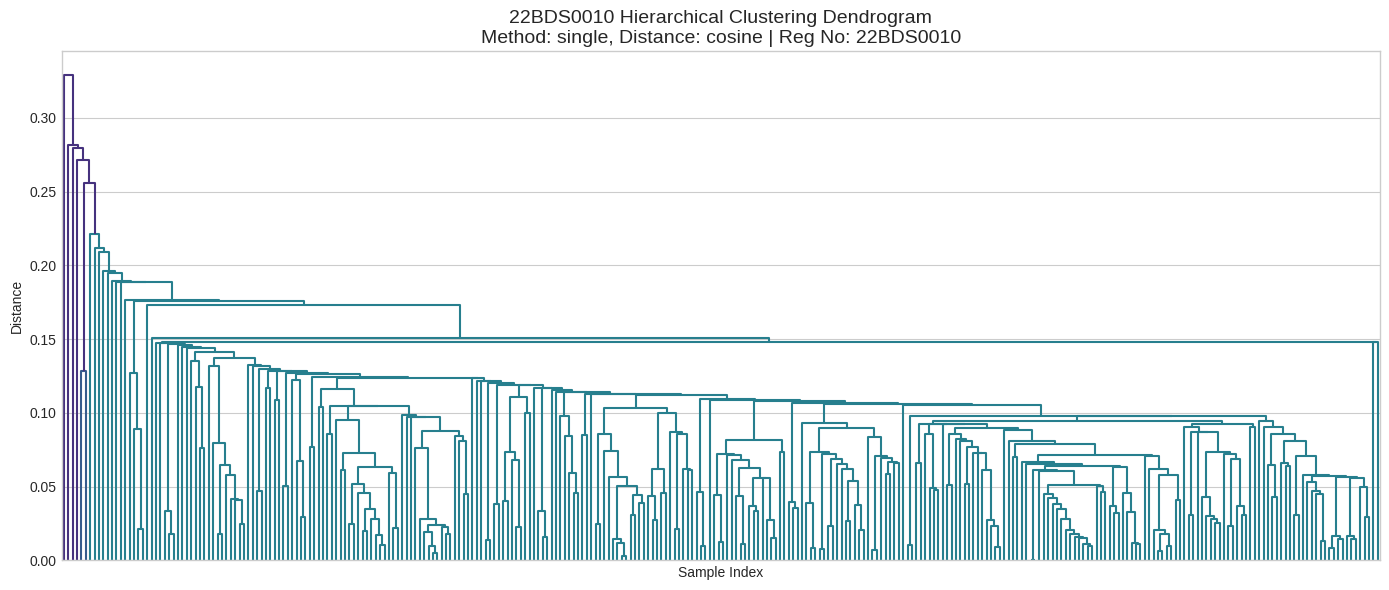

  - cosine distance, 2 clusters: Silhouette Score = -0.2369
  - cosine distance, 3 clusters: Silhouette Score = -0.2367
  - cosine distance, 4 clusters: Silhouette Score = -0.2544
  - cosine distance, 5 clusters: Silhouette Score = -0.2789
  => Optimal clusters with cosine: 3, Silhouette: -0.2367


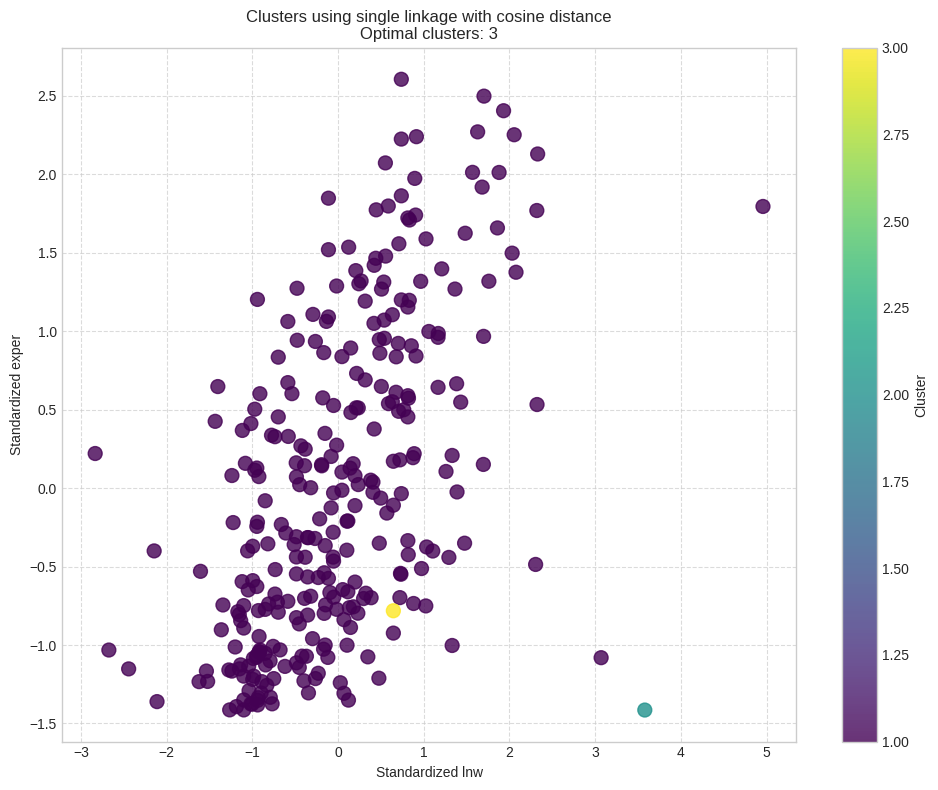

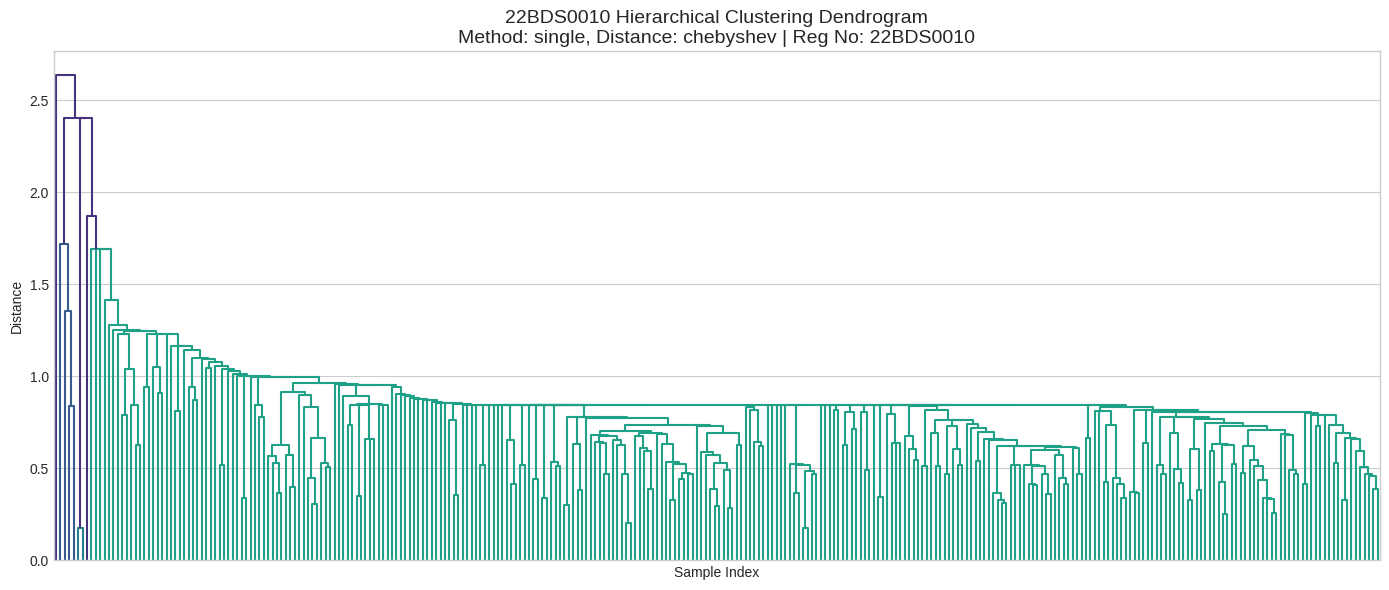

  - chebyshev distance, 2 clusters: Silhouette Score = 0.2963
  - chebyshev distance, 3 clusters: Silhouette Score = 0.2963
  - chebyshev distance, 4 clusters: Silhouette Score = 0.2905
  - chebyshev distance, 5 clusters: Silhouette Score = 0.2550
  => Optimal clusters with chebyshev: 2, Silhouette: 0.2963


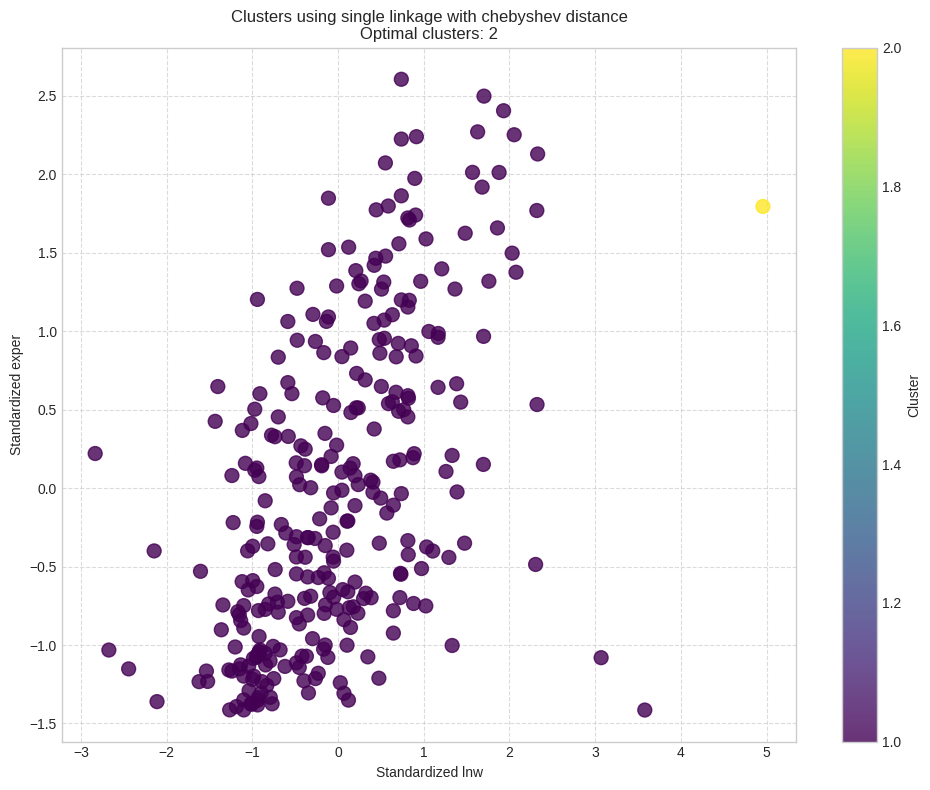


COMPLETE LINKAGE METHOD:


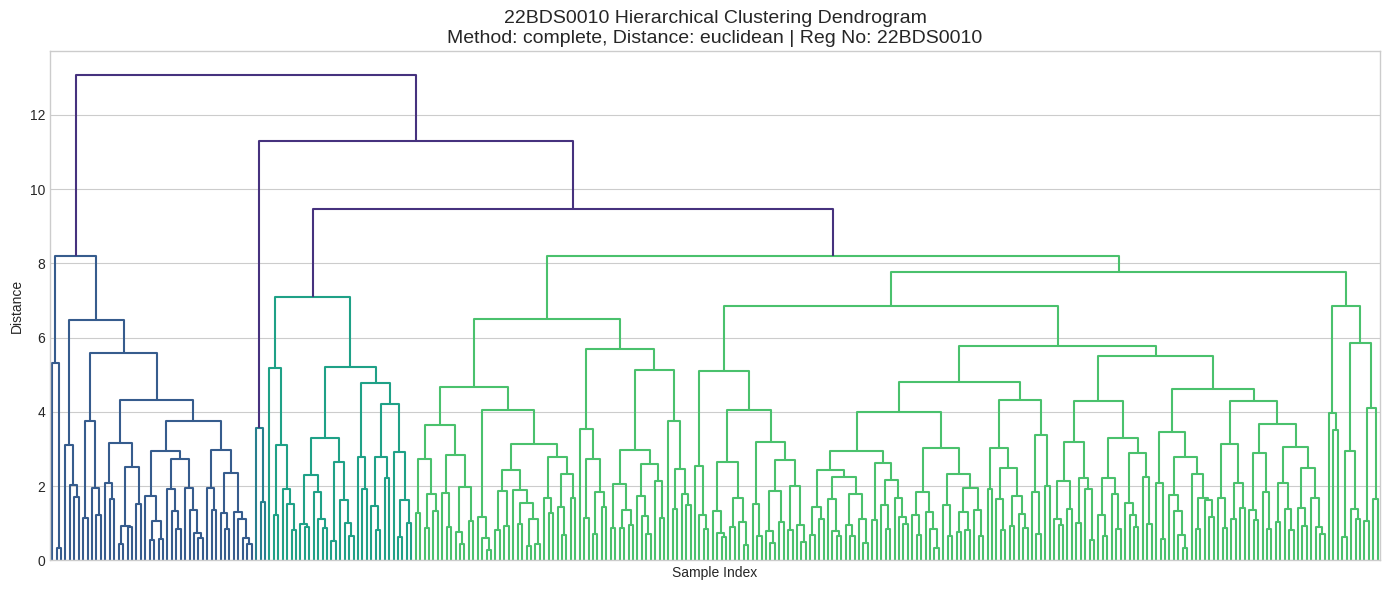

  - euclidean distance, 2 clusters: Silhouette Score = 0.2301
  - euclidean distance, 3 clusters: Silhouette Score = 0.2374
  - euclidean distance, 4 clusters: Silhouette Score = 0.1763
  - euclidean distance, 5 clusters: Silhouette Score = 0.1701
  => Optimal clusters with euclidean: 3, Silhouette: 0.2374


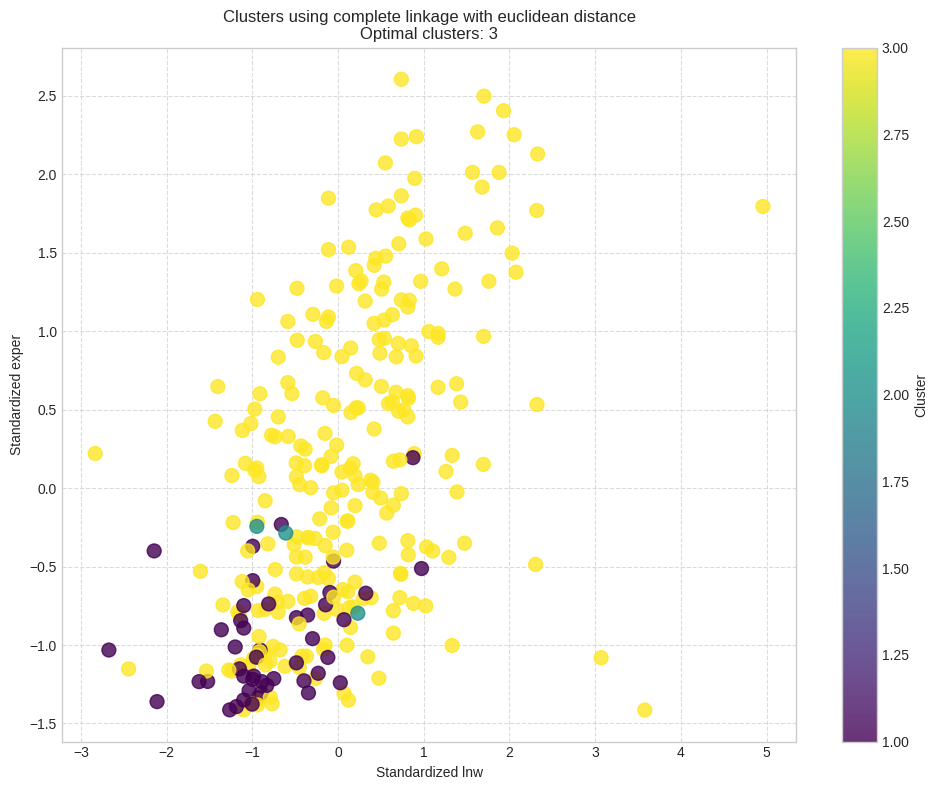

  Error with manhattan distance: Unknown Distance Metric: manhattan


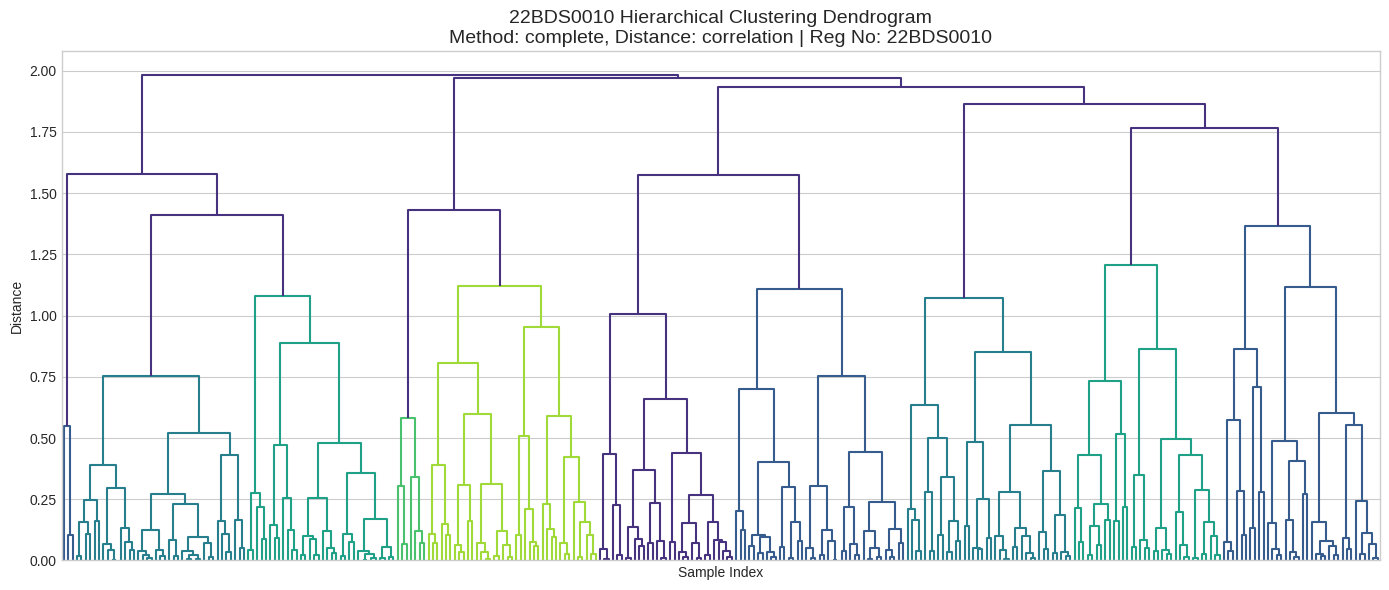

  - correlation distance, 2 clusters: Silhouette Score = 0.1633
  - correlation distance, 3 clusters: Silhouette Score = 0.1185
  - correlation distance, 4 clusters: Silhouette Score = 0.1149
  - correlation distance, 5 clusters: Silhouette Score = 0.1123
  => Optimal clusters with correlation: 2, Silhouette: 0.1633


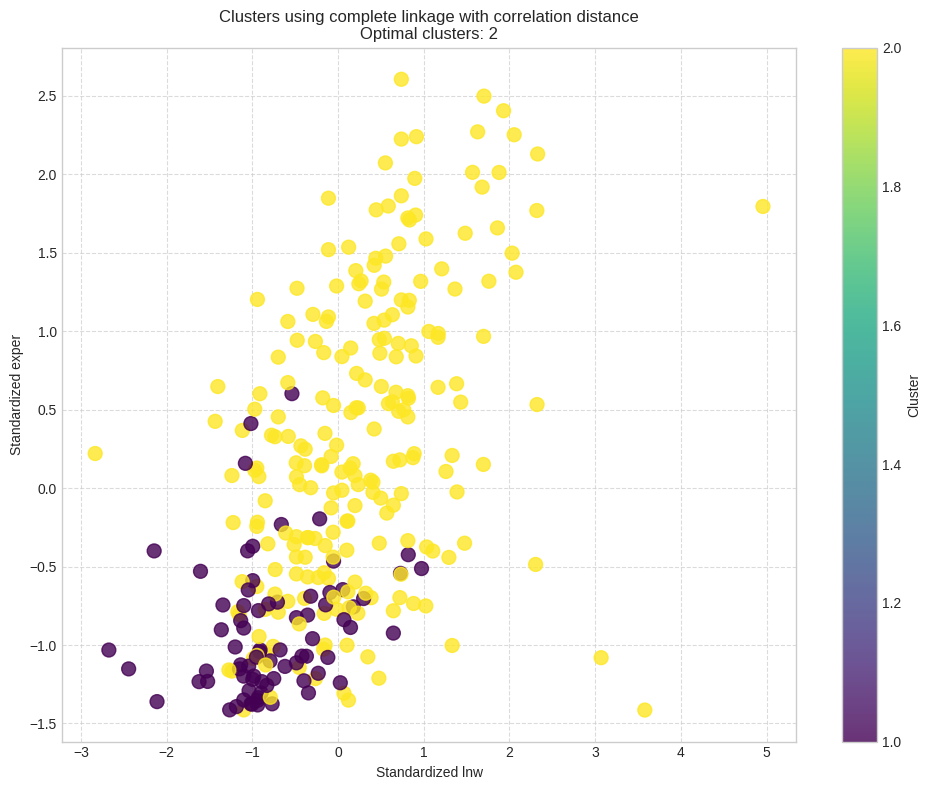

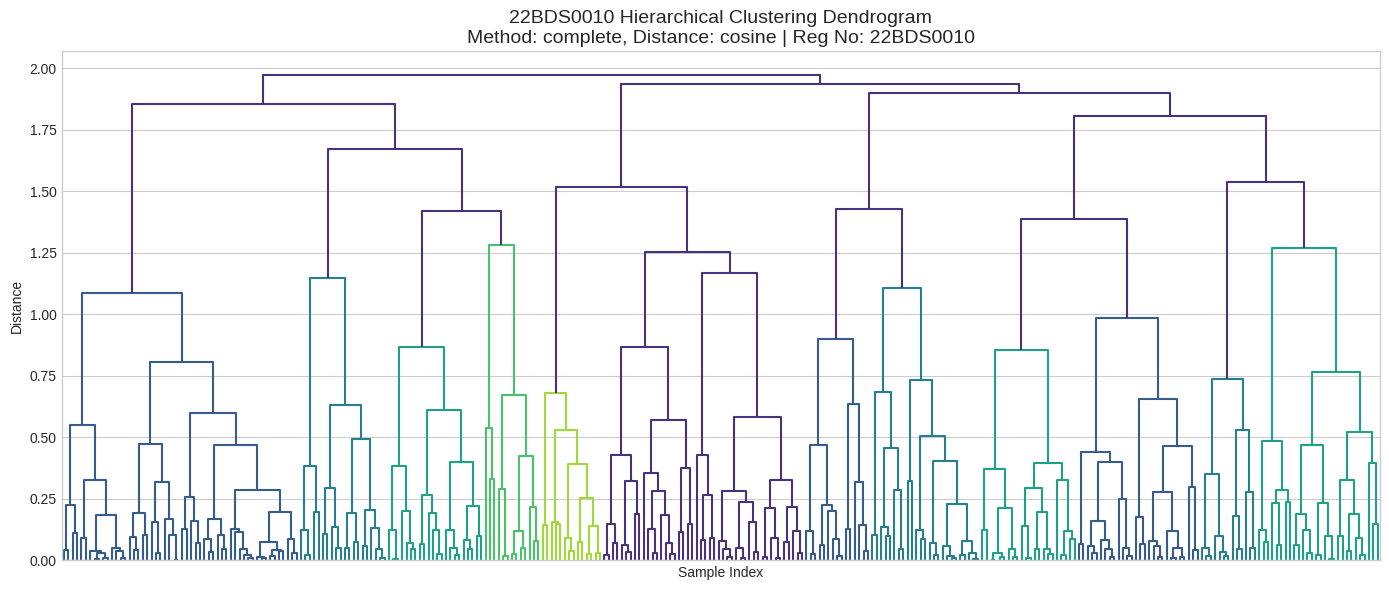

  - cosine distance, 2 clusters: Silhouette Score = 0.1742
  - cosine distance, 3 clusters: Silhouette Score = 0.1362
  - cosine distance, 4 clusters: Silhouette Score = 0.1033
  - cosine distance, 5 clusters: Silhouette Score = 0.1281
  => Optimal clusters with cosine: 2, Silhouette: 0.1742


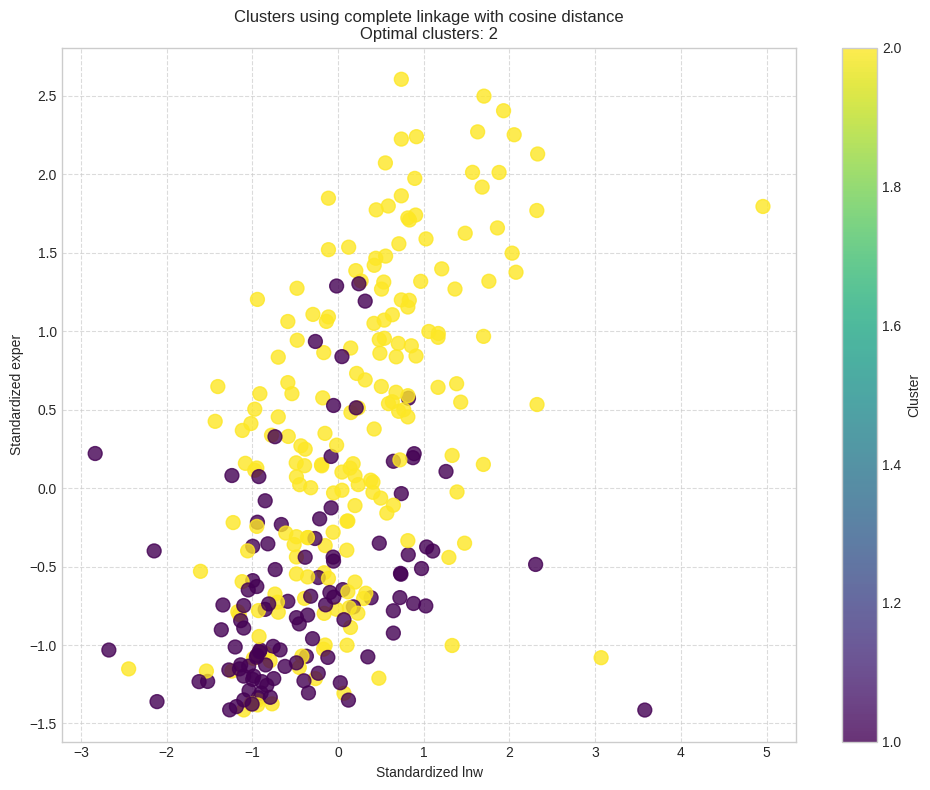

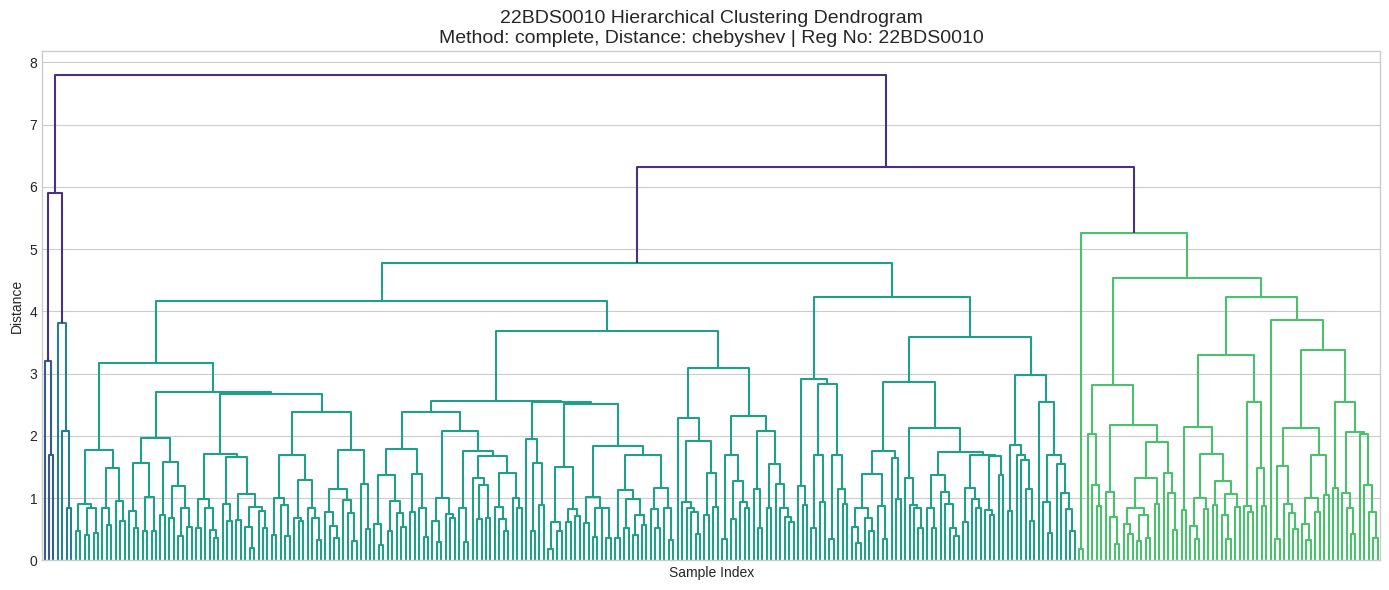

  - chebyshev distance, 2 clusters: Silhouette Score = 0.3455
  - chebyshev distance, 3 clusters: Silhouette Score = 0.2155
  - chebyshev distance, 4 clusters: Silhouette Score = 0.2020
  - chebyshev distance, 5 clusters: Silhouette Score = 0.1958
  => Optimal clusters with chebyshev: 2, Silhouette: 0.3455


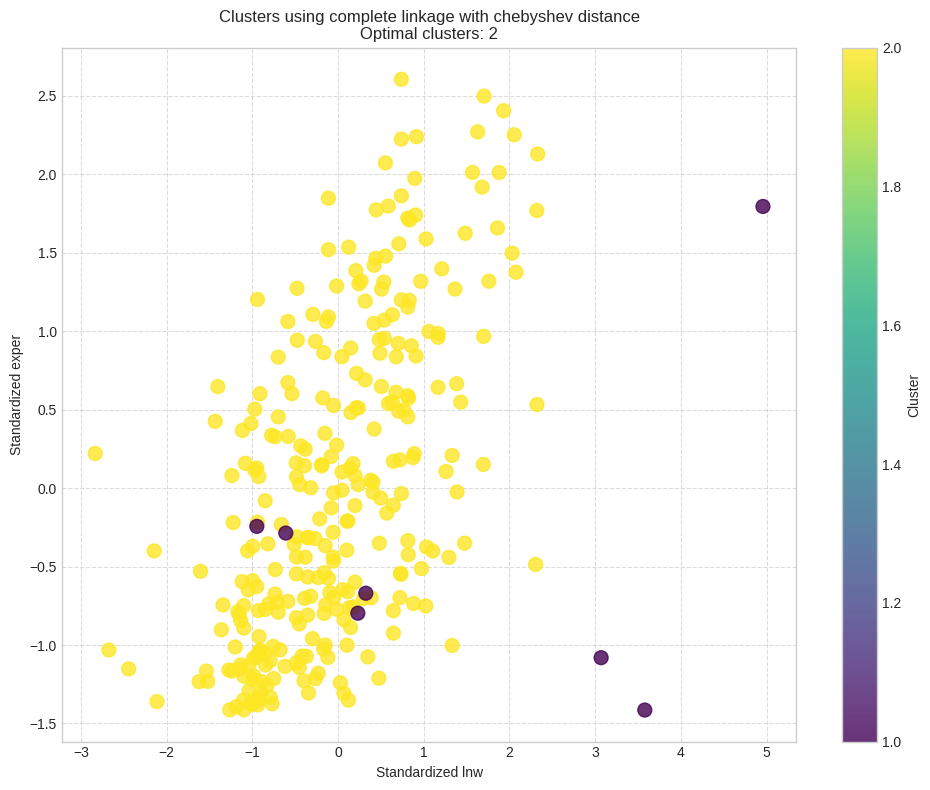


AVERAGE LINKAGE METHOD:


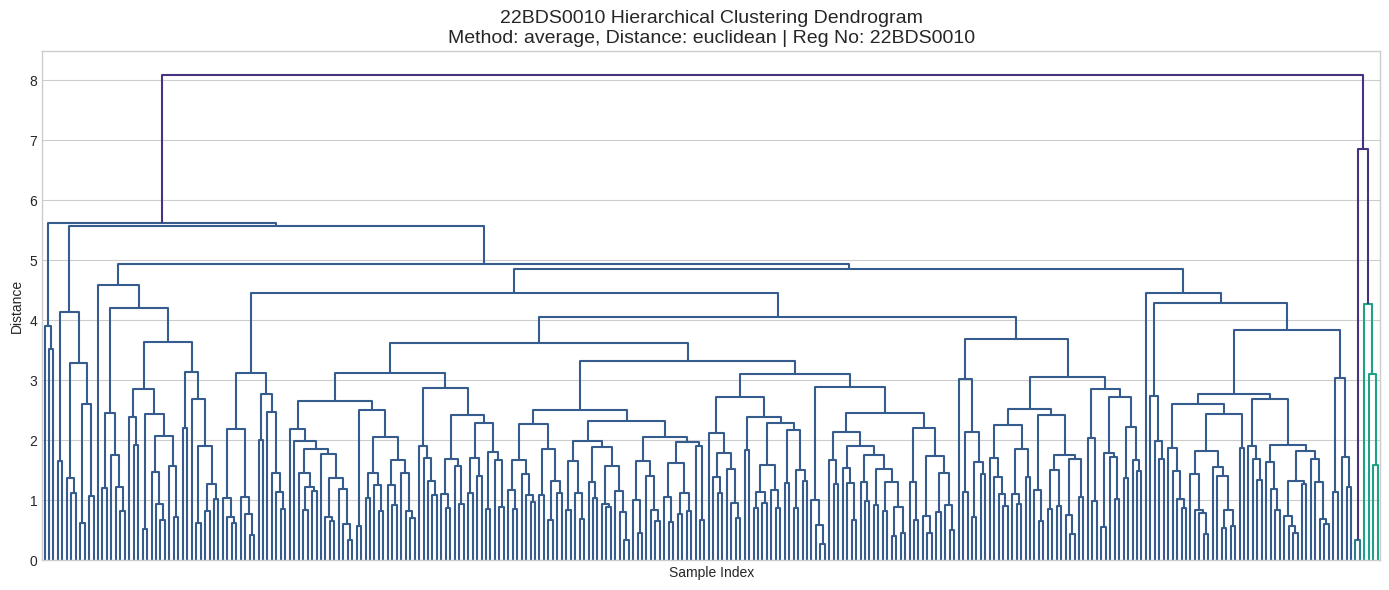

  - euclidean distance, 2 clusters: Silhouette Score = 0.4630
  - euclidean distance, 3 clusters: Silhouette Score = 0.4126
  - euclidean distance, 4 clusters: Silhouette Score = 0.2357
  - euclidean distance, 5 clusters: Silhouette Score = 0.1912
  => Optimal clusters with euclidean: 2, Silhouette: 0.4630


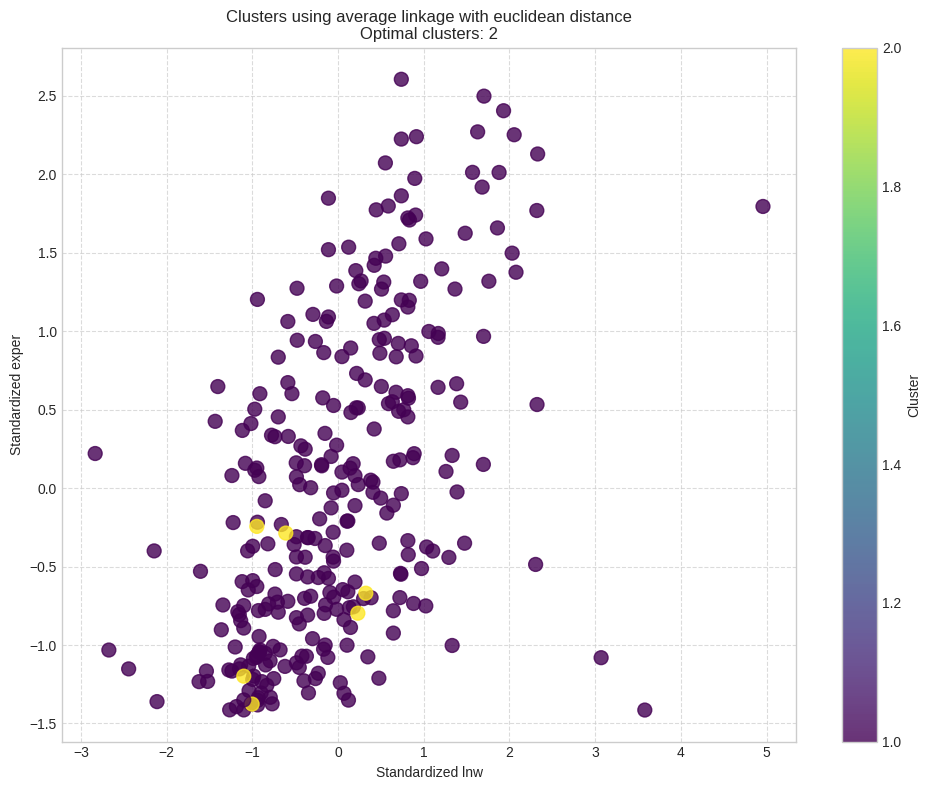

  Error with manhattan distance: Unknown Distance Metric: manhattan


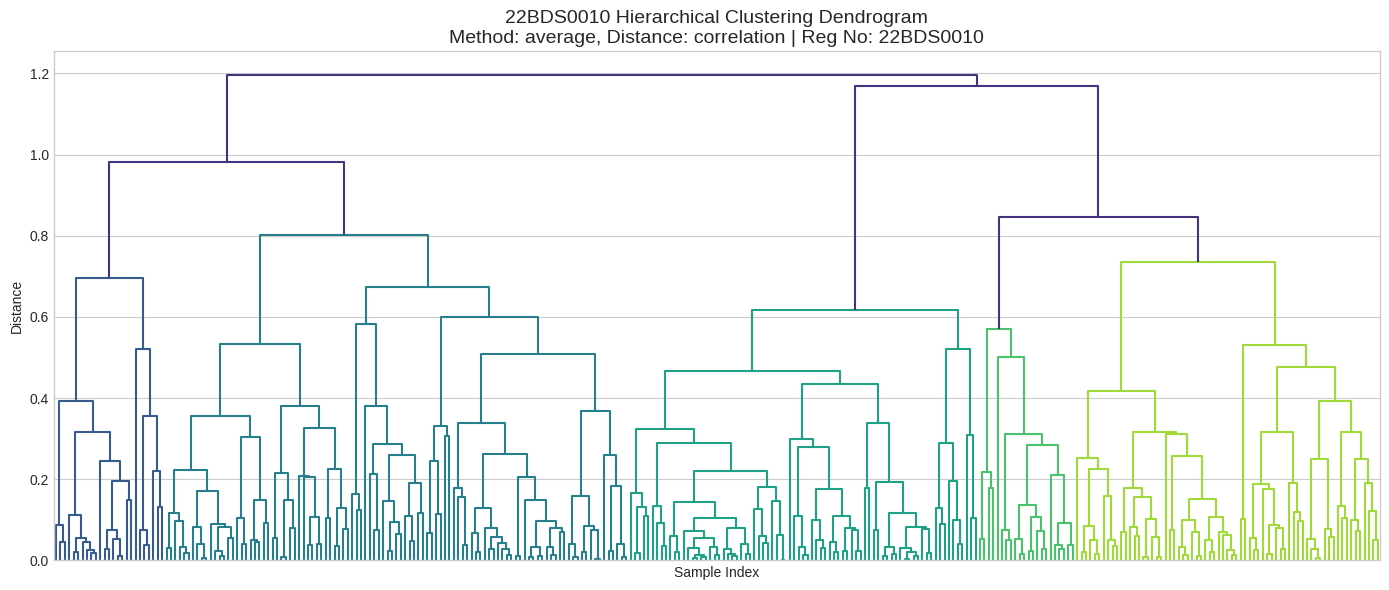

  - correlation distance, 2 clusters: Silhouette Score = 0.1468
  - correlation distance, 3 clusters: Silhouette Score = 0.1644
  - correlation distance, 4 clusters: Silhouette Score = 0.1759
  - correlation distance, 5 clusters: Silhouette Score = 0.1124
  => Optimal clusters with correlation: 4, Silhouette: 0.1759


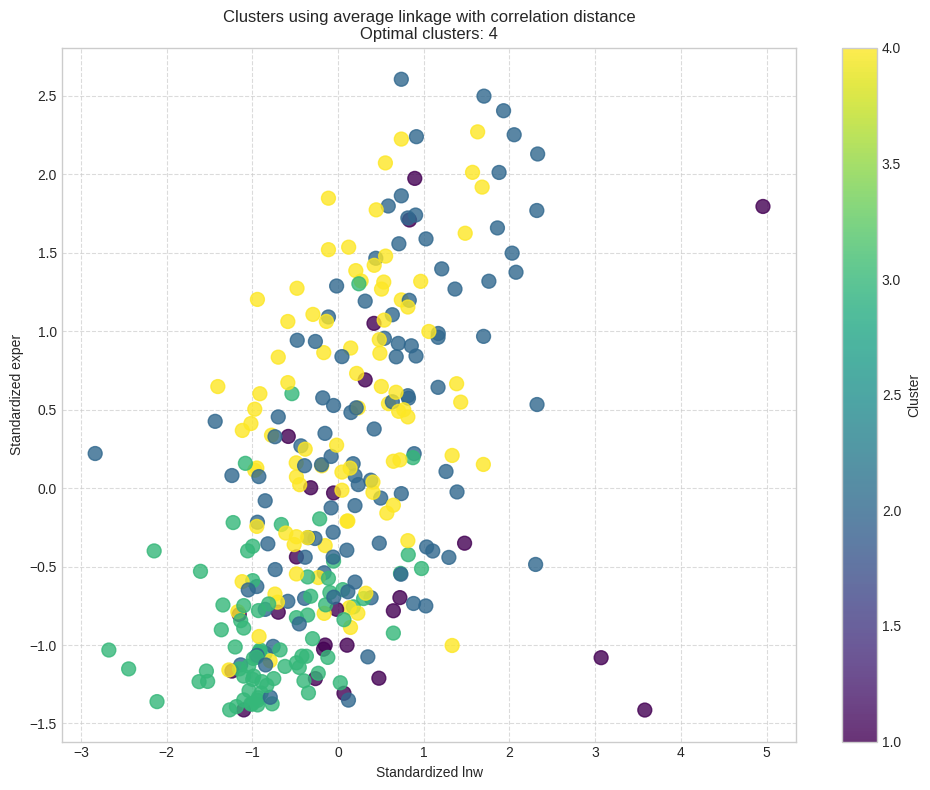

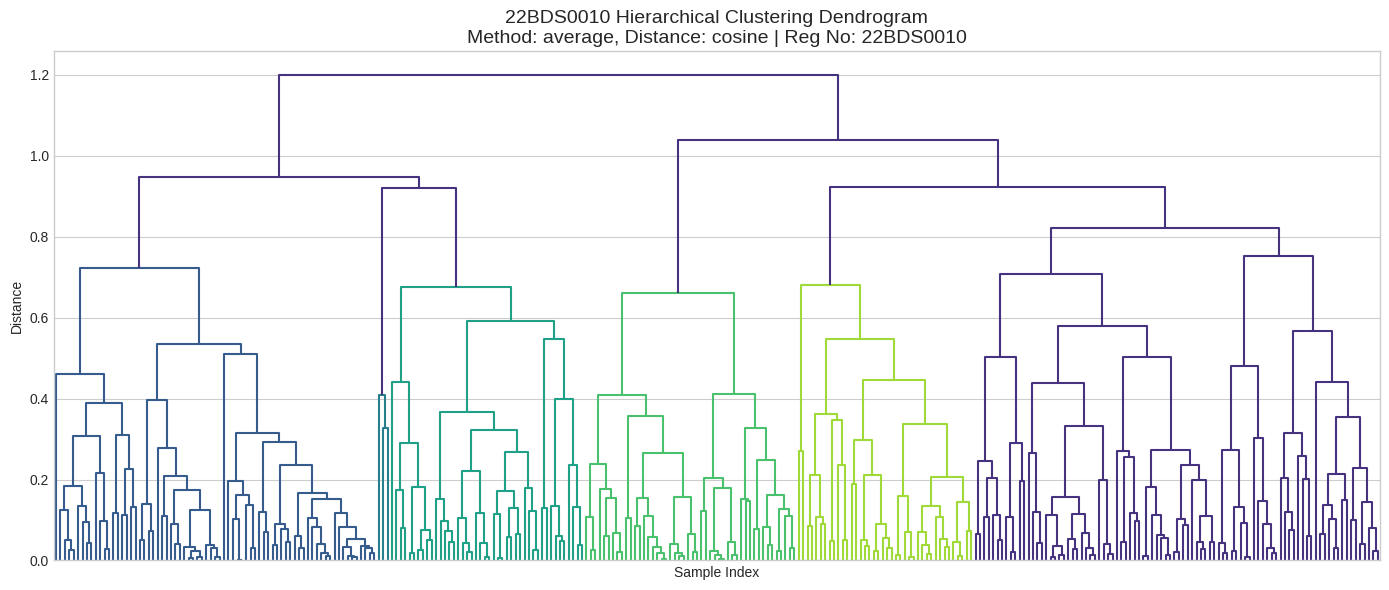

  - cosine distance, 2 clusters: Silhouette Score = 0.1910
  - cosine distance, 3 clusters: Silhouette Score = 0.1098
  - cosine distance, 4 clusters: Silhouette Score = 0.1175
  - cosine distance, 5 clusters: Silhouette Score = 0.1415
  => Optimal clusters with cosine: 2, Silhouette: 0.1910


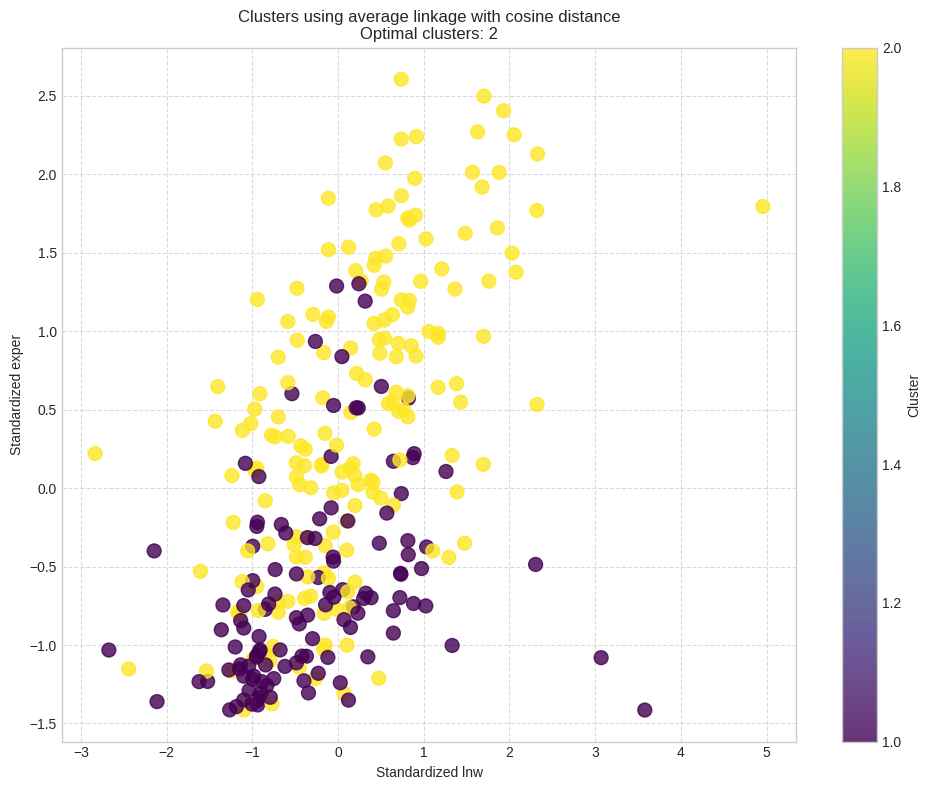

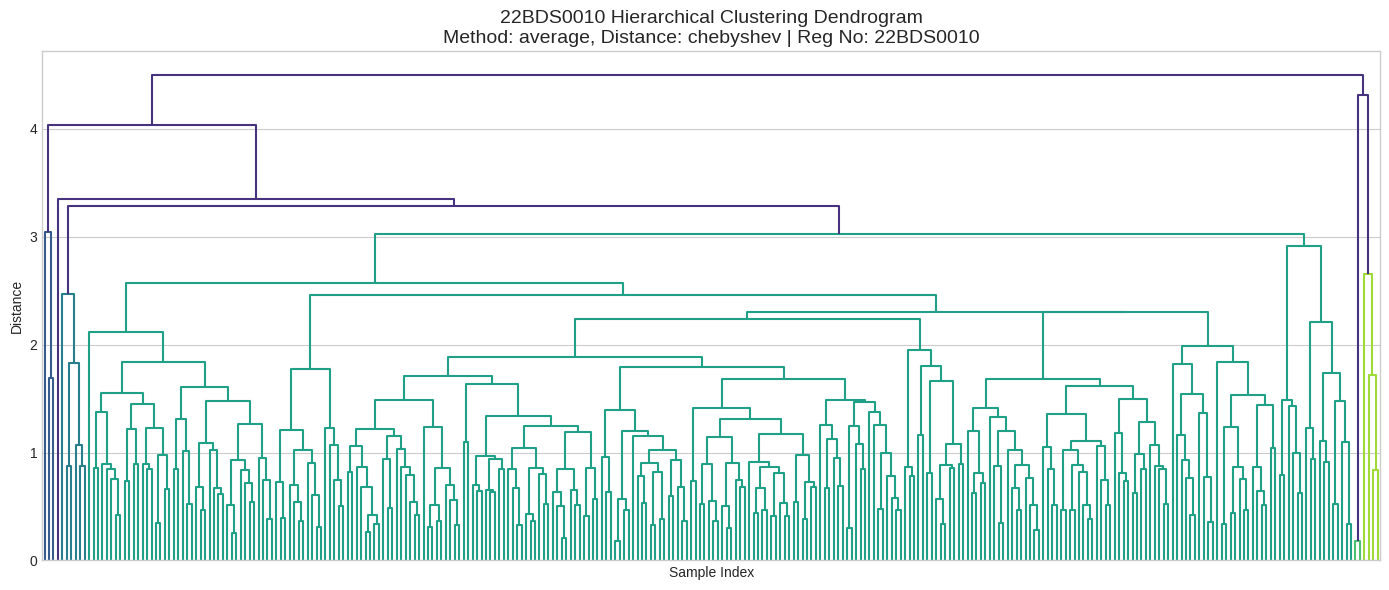

  - chebyshev distance, 2 clusters: Silhouette Score = 0.4630
  - chebyshev distance, 3 clusters: Silhouette Score = 0.4126
  - chebyshev distance, 4 clusters: Silhouette Score = 0.2357
  - chebyshev distance, 5 clusters: Silhouette Score = 0.1606
  => Optimal clusters with chebyshev: 2, Silhouette: 0.4630


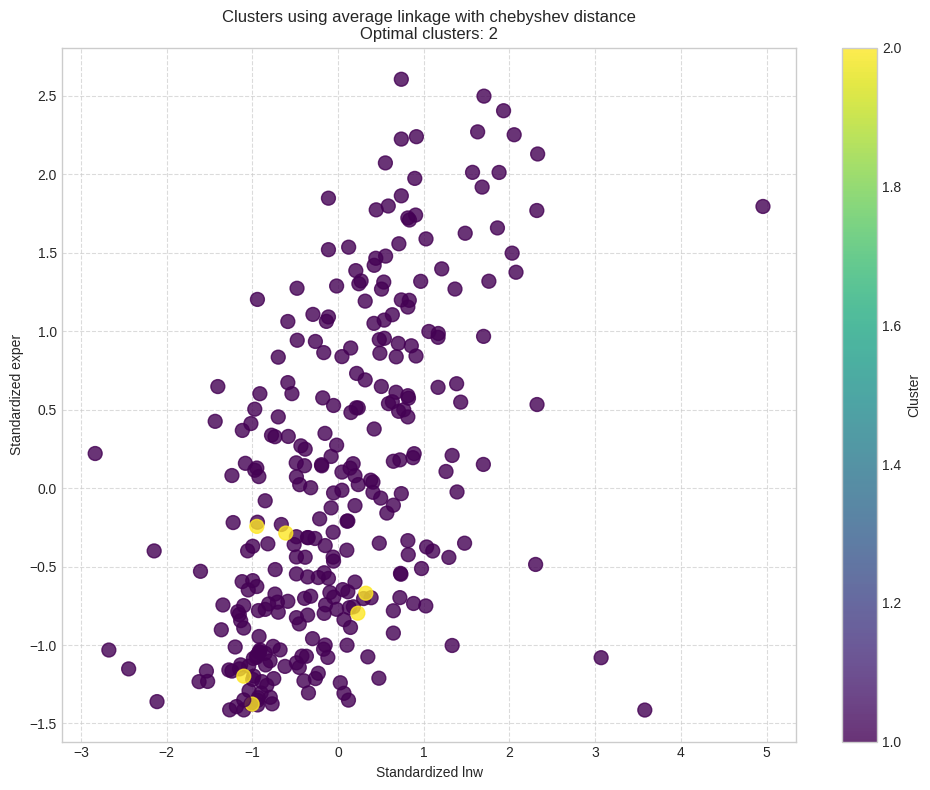


WARD LINKAGE METHOD:
  Error with euclidean distance: `method=ward` requires the distance metric to be Euclidean


In [431]:
for method in linkage_methods:
    results[method] = {}
    print(f"\n{method.upper()} LINKAGE METHOD:")

    for metric in metrics:
        if method == 'ward' and metric != 'euclidean':
            continue

        try:
            Z = linkage(df_scaled, method=method if method != 'ward' else 'ward',
                        metric=metric if method != 'ward' else None)

            plot_title = f'22BDS0010 Hierarchical Clustering Dendrogram\nMethod: {method}, Distance: {metric}'
            plot_dendrogram(Z, range(len(df)), plot_title, show_leaf_labels=False)

            max_silhouette = -1
            optimal_k = 2

            for k in range(2, 6):
                cluster_labels = fcluster(Z, k, criterion='maxclust')
                if len(np.unique(cluster_labels)) > 1:
                    sil_score = silhouette_score(df_scaled, cluster_labels)
                    print(f"  - {metric} distance, {k} clusters: Silhouette Score = {sil_score:.4f}")
                    if sil_score > max_silhouette:
                        max_silhouette = sil_score
                        optimal_k = k

            cluster_labels = fcluster(Z, optimal_k, criterion='maxclust')
            results[method][metric] = {
                'linkage_matrix': Z,
                'optimal_clusters': optimal_k,
                'silhouette_score': max_silhouette,
                'cluster_labels': cluster_labels
            }

            print(f"  => Optimal clusters with {metric}: {optimal_k}, Silhouette: {max_silhouette:.4f}")

            plt.figure(figsize=(10, 8))
            plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=cluster_labels, cmap='viridis',
                        alpha=0.8, s=100)
            plt.title(f'Clusters using {method} linkage with {metric} distance\nOptimal clusters: {optimal_k}')
            plt.xlabel('Standardized lnw')
            plt.ylabel('Standardized exper')
            plt.colorbar(label='Cluster')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"  Error with {metric} distance: {e}")


## 10.6 Now Choosing the best method among them

In [432]:

print("\n=== COMPARISON OF BEST RESULTS ===\n")
print("Method\t\tDistance\tClusters\tSilhouette Score")
print("-" * 60)

best_overall = {'method': None, 'metric': None, 'score': -1}

for method in results:
    for metric in results[method]:
        score = results[method][metric]['silhouette_score']
        clusters = results[method][metric]['optimal_clusters']
        print(f"{method}\t\t{metric}\t\t{clusters}\t\t{score:.4f}")
        if score > best_overall['score']:
            best_overall = {
                'method': method,
                'metric': metric,
                'clusters': clusters,
                'score': score
            }

print("\nBest clustering result:")
print(f"Method: {best_overall['method']}, Distance: {best_overall['metric']}, " +
      f"Clusters: {best_overall['clusters']}, Silhouette Score: {best_overall['score']:.4f}")



=== COMPARISON OF BEST RESULTS ===

Method		Distance	Clusters	Silhouette Score
------------------------------------------------------------
single		euclidean		2		0.5216
single		correlation		2		-0.1714
single		cosine		3		-0.2367
single		chebyshev		2		0.2963
complete		euclidean		3		0.2374
complete		correlation		2		0.1633
complete		cosine		2		0.1742
complete		chebyshev		2		0.3455
average		euclidean		2		0.4630
average		correlation		4		0.1759
average		cosine		2		0.1910
average		chebyshev		2		0.4630

Best clustering result:
Method: single, Distance: euclidean, Clusters: 2, Silhouette Score: 0.5216


Assigning the final cluster

In [ ]:

best_labels = results[best_overall['method']][best_overall['metric']]['cluster_labels']
df['cluster'] = best_labels


Summary

In [ ]:

valid_numeric_cols = [col for col in numeric_cols if col in df.columns]


print("\n=== CLUSTER CHARACTERISTICS ===\n")
for cluster in range(1, best_overall['clusters'] + 1):
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster {cluster} (Size: {len(cluster_data)})")
    print(cluster_data[valid_numeric_cols].mean())
    print("-" * 40)



=== CLUSTER CHARACTERISTICS ===

Cluster 1 (Size: 2)
lnw               1.5115
exper             0.3720
postexp           0.0000
hgc               9.0000
hgc.9             0.0000
uerate           17.2500
ue.7             10.2500
ue.centert1      -0.1500
ue.mean          12.6000
ue.person.cen     4.6510
ue1              17.4000
dtype: float64
----------------------------------------
Cluster 2 (Size: 298)
lnw              1.956275
exper            4.038466
postexp          1.273849
hgc              8.889262
hgc.9           -0.110738
uerate           6.412651
ue.7            -0.564624
ue.centert1     -1.871408
ue.mean          6.429631
ue.person.cen   -0.016443
ue1              8.325235
dtype: float64
----------------------------------------


# step 11 K-Means clustering

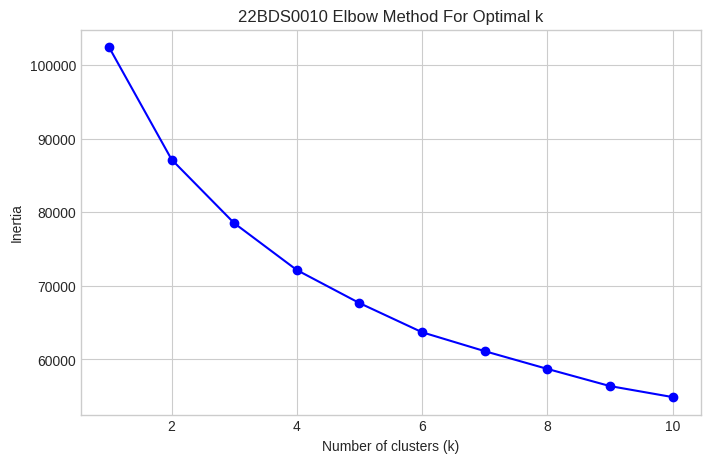

rownames  id    lnw  exper  ged  postexp  black  hispanic  hgc  hgc.9  \
0         1  31  1.491  0.015    1    0.015      0         1    8     -1   
1         2  31  1.433  0.715    1    0.715      0         1    8     -1   
2         3  31  1.469  1.734    1    1.734      0         1    8     -1   
3         4  31  1.749  2.773    1    2.773      0         1    8     -1   
4         5  31  1.931  3.927    1    3.927      0         1    8     -1   

   uerate   ue.7  ue.centert1  ue.mean  ue.person.cen   ue1  cluster  
0    3.21 -3.785         0.00     3.21           0.00  3.21        0  
1    3.21 -3.785         0.00     3.21           0.00  3.21        0  
2    3.21 -3.785         0.00     3.21           0.00  3.21        2  
3    3.30 -3.705         0.08     3.21           0.08  3.21        2  
4    2.89 -4.105        -0.32     3.21          -0.32  3.21        2

In [433]:

from sklearn.cluster import KMeans

numeric_df = df.select_dtypes(include=[np.number])


numeric_df = numeric_df.fillna(numeric_df.mean())

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_df)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('22BDS0010 Elbow Method For Optimal k')
plt.grid(True)
plt.show()


optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)


df['cluster'] = cluster_labels
df.head()



# Step 12 PCA

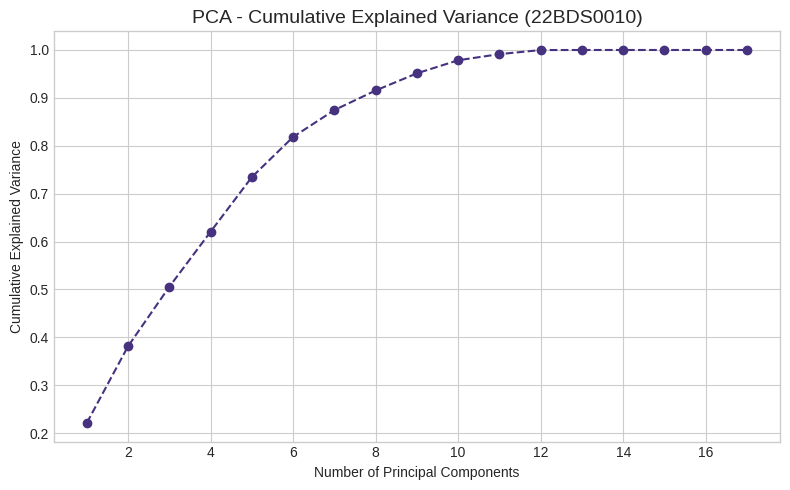

PC1: 0.2214
PC2: 0.1602
PC3: 0.1241
PC4: 0.1149
PC5: 0.1140
PC6: 0.0838
PC7: 0.0561
PC8: 0.0409
PC9: 0.0358
PC10: 0.0273
PC11: 0.0128
PC12: 0.0085
PC13: 0.0002
PC14: 0.0000
PC15: 0.0000
PC16: 0.0000
PC17: 0.0000


In [442]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns



numeric_df = df.select_dtypes(include=[np.number]).dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


pca = PCA()
pca_data = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])


explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--')
plt.title('PCA - Cumulative Explained Variance (22BDS0010)', fontsize=14)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var:.4f}")


Module 7


## 12.1 Split into training dataset

Import required libraries

In [443]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load and prepare dataset

In [444]:
df = df[['exper', 'lnw']].dropna()
df.head()

exper    lnw
0  0.015  1.491
1  0.715  1.433
2  1.734  1.469
3  2.773  1.749
4  3.927  1.931

Train Test split

In [445]:

X = df[['exper']]
y = df['lnw']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


## 12.2   Train linear regression model

In [446]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred


## 12.3  Performance Metrics

In [447]:

print(f"R-squared: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")


R-squared: 0.1081
Mean Squared Error: 0.1562


## 12.4 Prediction Plot

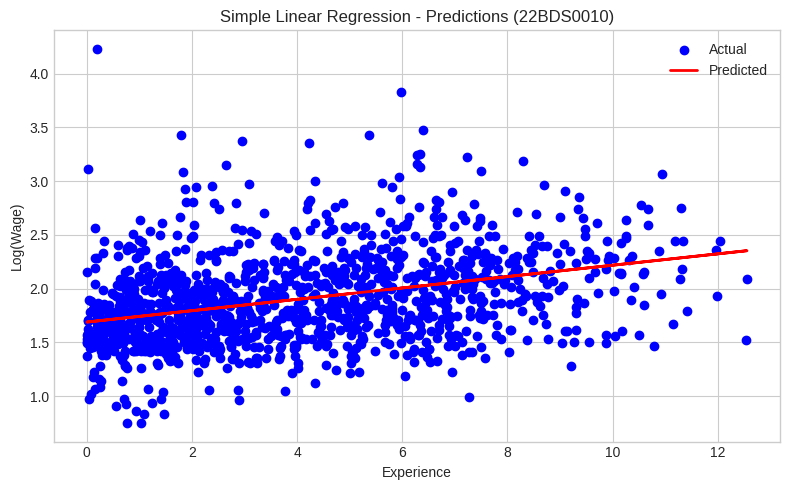

In [448]:

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression - Predictions (22BDS0010)')
plt.xlabel('Experience')
plt.ylabel('Log(Wage)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 12.5 Residual Plot

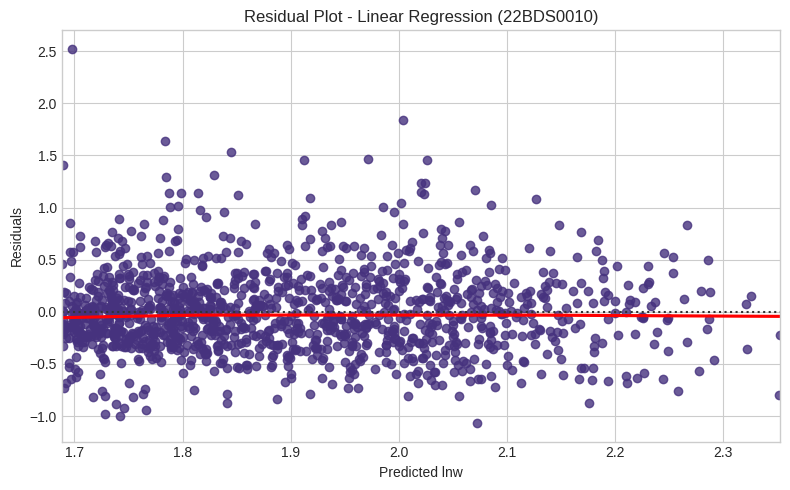

In [449]:

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot - Linear Regression (22BDS0010)')
plt.xlabel('Predicted lnw')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()
